In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df1 = pd.read_csv('df1.csv')

In [3]:
df1 = df1[['Time','Adresse','T1','P_DC']]

In [4]:
df1.head()

Time  Adresse       T1  P_DC
0  '2017-04-20 00:02:00'      113  20.2319   0.0
1  '2017-04-20 00:04:00'      113  20.1994   0.0
2  '2017-04-20 00:06:00'      113  20.1679   0.0
3  '2017-04-20 00:08:00'      113  20.1724   0.0
4  '2017-04-20 00:10:00'      113  20.2354   0.0

In [5]:
df1.dtypes

Time        object
Adresse      int64
T1         float64
P_DC       float64
dtype: object

In [6]:
df1['Time']= pd.to_datetime(df1['Time'])

In [7]:
df1 = df1.set_index('Time')
df1.head()

Adresse       T1  P_DC
Time                                       
2017-04-20 00:02:00      113  20.2319   0.0
2017-04-20 00:04:00      113  20.1994   0.0
2017-04-20 00:06:00      113  20.1679   0.0
2017-04-20 00:08:00      113  20.1724   0.0
2017-04-20 00:10:00      113  20.2354   0.0

In [8]:
df1 = df1.resample('1H').mean()
df1

Adresse         T1  P_DC
Time                                         
2017-04-20 00:00:00    113.0  19.804954   0.0
2017-04-20 01:00:00    113.0  18.352620   0.0
2017-04-20 02:00:00    113.0  17.571907   0.0
2017-04-20 03:00:00    113.0  16.541680   0.0
2017-04-20 04:00:00    113.0  15.982507   0.0
...                      ...        ...   ...
2020-06-02 01:00:00    113.0  17.021167   0.0
2020-06-02 02:00:00    113.0  16.538703   0.0
2020-06-02 03:00:00    113.0  16.166043   0.0
2020-06-02 04:00:00    113.0  15.708217   0.0
2020-06-02 05:00:00    113.0  16.339752   0.0

[27342 rows x 3 columns]

In [9]:
df1 = df1.between_time('08:00','18:00')

In [10]:
df1 = df1[df1 >= 0]

In [11]:
df1.isna().sum()

Adresse    2100
T1         2107
P_DC       3993
dtype: int64

In [12]:
df1 = df1.dropna()
df1

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    113.0  16.851623   366.081767
2017-04-20 09:00:00    113.0  19.969697  1257.578933
2017-04-20 10:00:00    113.0  22.107143  1640.896000
2017-04-20 11:00:00    113.0  26.679253  3058.417000
2017-04-20 12:00:00    113.0  32.019423  4536.226000
...                      ...        ...          ...
2020-06-01 14:00:00    113.0  49.558130     0.000000
2020-06-01 15:00:00    113.0  45.099617     0.000000
2020-06-01 16:00:00    113.0  41.618023     0.000000
2020-06-01 17:00:00    113.0  34.499433     0.000000
2020-06-01 18:00:00    113.0  27.254573     0.000000

[8529 rows x 3 columns]

**Histogram**

In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

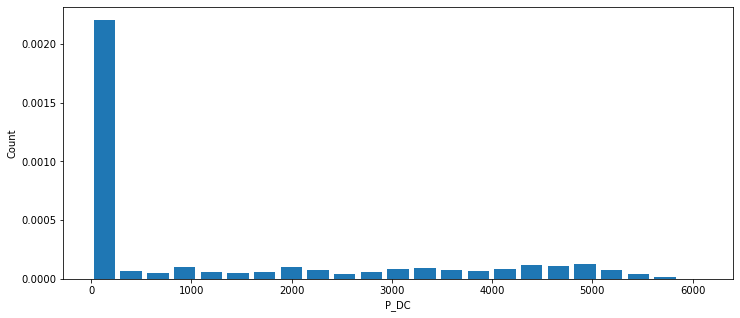

In [14]:
plt.figure(figsize=(12,5))
plt.hist(df1['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

**Scatter plot**

In [15]:
'''
y0 = df1['P_DC'].values
y0 = y0.reshape(-1, 1)
y0.shape



for i in df1.columns:
    x1 = df1['{}'.format(i)]
    plt.scatter(x1, y0, color='blue')
    plt.xlabel(i)
    plt.ylabel('P_DC')
    plt.show()
'''

"\ny0 = df1['P_DC'].values\ny0 = y0.reshape(-1, 1)\ny0.shape\n\n\n\nfor i in df1.columns:\n    x1 = df1['{}'.format(i)]\n    plt.scatter(x1, y0, color='blue')\n    plt.xlabel(i)\n    plt.ylabel('P_DC')\n    plt.show()\n"

**Exploration**

In [3]:
import seaborn as sn

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

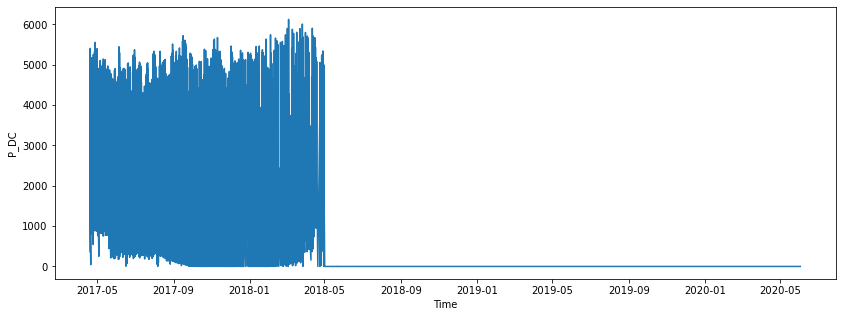

In [17]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df1.index ,y='P_DC' ,data=df1)

In [18]:
mask = (df1.index <= '2018-05-01')
df1 = df1.loc[mask]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

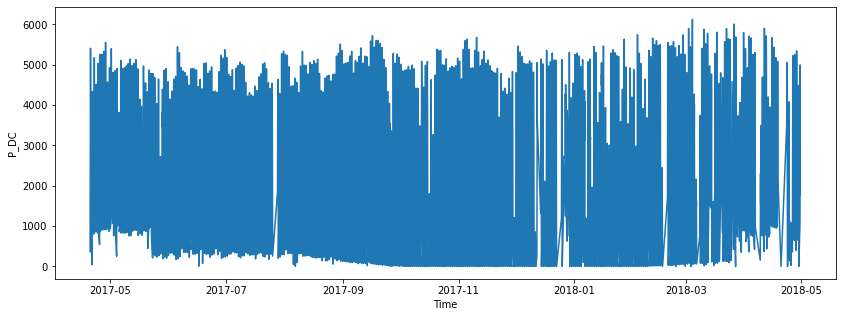

In [19]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df1.index ,y='P_DC' ,data=df1)

Text(0, 0.5, 'Count')

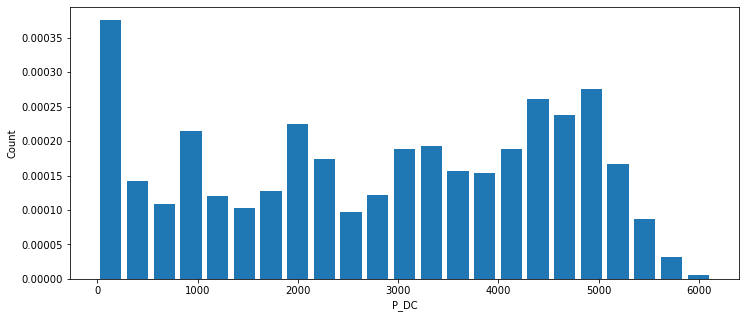

In [20]:
plt.figure(figsize=(12,5))
plt.hist(df1['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

# Stationary test

In [21]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df1['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.0500711624080967e-11


# Autocorrelation_ PACF

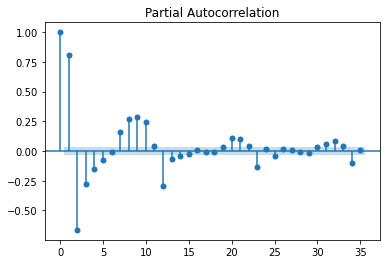

In [22]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df1['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR

In [23]:
df_AR1 = df1['P_DC']

In [24]:
train_size = int(len(df1) * 0.95)
test_size = len(df1) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df1)]
print(len(train), len(test))

3720 196


In [25]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags = 5).fit()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [26]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 3720
Model:                     AutoReg(5)   Log Likelihood              -29605.783
Method:               Conditional MLE   S.D. of innovations            699.466
Date:                Thu, 26 Aug 2021   AIC                             13.104
Time:                        15:41:23   BIC                             13.116
Sample:                             5   HQIC                            13.109
                                 3720                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1448.3053     39.522     36.645      0.000    1370.843    1525.768
P_DC.L1        1.1146      0.016     68.187      0.000       1.083       1.147
P_DC.L2       -0.3541      0.025    -14.445      0.0

In [27]:
pred = model.predict(start = train_size, end = len(df1)-1, dynamic = False)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


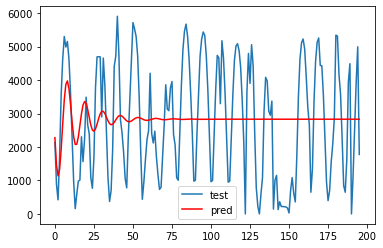

In [28]:
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA

In [29]:
#pip install pmdarima

In [30]:
from pmdarima import auto_arima
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62242.031, Time=4.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=65680.408, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=64529.519, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=64679.131, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=65678.409, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=64439.773, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=62329.448, Time=4.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=62234.824, Time=5.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=64437.182, Time=5.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=62222.770, Time=4.89 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=62237.725, Time=6.07 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=61681.419, Time=7.25 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=61883.689, Time=6.13 sec
 ARIMA(4,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3916
Model:               SARIMAX(3, 1, 4)   Log Likelihood              -30831.710
Date:                Thu, 26 Aug 2021   AIC                          61681.419
Time:                        15:42:50   BIC                          61737.872
Sample:                             0   HQIC                         61701.452
                               - 3916                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0481      0.085     -0.566      0.571      -0.215       0.118
ar.L1          2.2015      0.018    124.066      0.000       2.167       2.236
ar.L2         -1.8741      0.030    -63.152      0.000      -1.932      -1.816
ar.L3          0.5203      0.018     29.718      0.000       0.486       0.555
ma.L1         -2.3043      0.019   -124.058      0.000      -2.341      -2.268
ma.L2          1.7635      0.044     40.278      0.000       1.678       1.849
ma.L3         -0.1970      0.040     -4.868      0.000      -0.276      -0.118
ma.L4         -0.2545      0.015    -17.103      0.000      -0.284      -0.225
sigma2      4.006e+05   6197.799     64.637      0.000    3.88e+05    4.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):              3911.36
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.77e+14. Standard errors may be unstable.
"""

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import warnings 
warnings.filterwarnings("ignore")

In [32]:
model = ARIMA(train, order=(3,1,4)).fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86167D+00    |proj g|=  3.12905D-02

At iterate    5    f=  7.85601D+00    |proj g|=  3.87450D-02

At iterate   10    f=  7.85180D+00    |proj g|=  2.02288D-02

At iterate   15    f=  7.85079D+00    |proj g|=  8.06233D-02

At iterate   20    f=  7.84947D+00    |proj g|=  3.72911D-03

At iterate   25    f=  7.84937D+00    |proj g|=  1.26110D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  7.84936D+00    |proj g|=  3.74021D-03

At iterate   35    f=  7.84934D+00    |proj g|=  4.72884D-03

At iterate   40    f=  7.84929D+00    |proj g|=  1.44066D-02

At iterate   45    f=  7.84924D+00    |proj g|=  1.98857D-02

At iterate   50    f=  7.84920D+00    |proj g|=  1.59650D-03

At iterate   55    f=  7.84919D+00    |proj g|=  8.78764D-03

At iterate   60    f=  7.84917D+00    |proj g|=  1.25765D-02

At iterate   65    f=  7.84917D+00    |proj g|=  6.32117D-04

At iterate   70    f=  7.84917D+00    |proj g|=  1.90328D-03

At iterate   75    f=  7.84917D+00    |proj g|=  9.84901D-04

At iterate   80    f=  7.84916D+00    |proj g|=  2.12905D-03

At iterate   85    f=  7.84916D+00    |proj g|=  1.40084D-03

At iterate   90    f=  7.84916D+00    |proj g|=  1.06484D-03

At iterate   95    f=  7.84916D+00    |proj g|=  4.23679D-03

At iterate  100    f=  7.84915D+00    |proj g|=  8.69589D-03

At iterate  105    f=  7.84915D+00    |proj g|=  1.81810D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  115    f=  7.84914D+00    |proj g|=  1.73408D-03

At iterate  120    f=  7.84914D+00    |proj g|=  7.83551D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  125    f=  7.84914D+00    |proj g|=  2.90523D-04

At iterate  130    f=  7.84914D+00    |proj g|=  9.65894D-04

At iterate  135    f=  7.84914D+00    |proj g|=  1.17719D-03

At iterate  140    f=  7.84914D+00    |proj g|=  1.04761D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  145    f=  7.84914D+00    |proj g|=  4.60254D-04

At iterate  150    f=  7.84914D+00    |proj g|=  4.31744D-04
  ys=-4.744E-16  -gs= 9.946E-17 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  155    f=  7.84914D+00    |proj g|=  2.07132D-03

At iterate  160    f=  7.84914D+00    |proj g|=  7.66942D-04

At iterate  165    f=  7.84914D+00    |proj g|=  1.37117D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  170    f=  7.84914D+00    |proj g|=  9.90319D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  175    f=  7.84914D+00    |proj g|=  1.18137D-03

At iterate  180    f=  7.84914D+00    |proj g|=  7.84528D-04

At iterate  185    f=  7.84914D+00    |proj g|=  7.26796D-04
  ys=-1.495E-11  -gs= 3.139E-11 BFGS update SKIPPED
  ys=-9.716E-14  -gs= 1.259E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  190    f=  7.84914D+00    |proj g|=  7.27862D-04

At iterate  195    f=  7.84914D+00    |proj g|=  6.79279D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  200    f=  7.84914D+00    |proj g|=  7.16582D-04

At iterate  205    f=  7.84914D+00    |proj g|=  6.55209D-04
  ys=-1.553E-11  -gs= 2.234E-11 BFGS update SKIPPED

At iterate  210    f=  7.84914D+00    |proj g|=  2.37055D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  215    f=  7.84914D+00    |proj g|=  6.15596D-04

At iterate  220    f=  7.84914D+00    |proj g|=  1.08962D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  225    f=  7.84914D+00    |proj g|=  6.17550D-04

At iterate  230    f=  7.84914D+00    |proj g|=  7.79643D-04

At iterate  235    f=  7.84914D+00    |proj g|=  1.64952D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  240    f=  7.84914D+00    |proj g|=  9.23084D-04

At iterate  245    f=  7.84914D+00    |proj g|=  1.38263D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  250    f=  7.84914D+00    |proj g|=  1.03908D-03

At iterate  255    f=  7.84914D+00    |proj g|=  1.03668D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  260    f=  7.84914D+00    |proj g|=  4.18510D-04

At iterate  265    f=  7.84914D+00    |proj g|=  8.12239D-04

At iterate  270    f=  7.84914D+00    |proj g|=  1.17319D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  275    f=  7.84914D+00    |proj g|=  5.47473D-04

At iterate  280    f=  7.84914D+00    |proj g|=  3.85736D-04
  ys=-1.111E-11  -gs= 4.228E-11 BFGS update SKIPPED

At iterate  285    f=  7.84914D+00    |proj g|=  5.03864D-04

At iterate  290    f=  7.84914D+00    |proj g|=  5.38058D-04

At iterate  295    f=  7.84914D+00    |proj g|=  5.12390D-04

At iterate  300    f=  7.84914D+00    |proj g|=  4.73399D-04

At iterate  305    f=  7.84914D+00    |proj g|=  2.36264D-03

At iterate  310    f=  7.84914D+00    |proj g|=  1.22355D-03

At iterate  315    f=  7.84914D+00    |proj g|=  1.80025D-03
  ys=-1.439E-08  -gs= 2.619E-08 BFGS update SKIPPED

At iterate  320    f=  7.84914D+00    |proj g|=  6.68976D-04

At iterate  325    f=  7.84914D+00    |proj g|=  3.72236D-04

At iterate  330    f=  7.84914D+00    |proj g|=  9.19531D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  335    f=  7.84914D+00    |proj g|=  9.63674D-04

At iterate  340    f=  7.84914D+00    |proj g|=  9.01146D-04

At iterate  345    f=  7.84914D+00    |proj g|=  9.48575D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  350    f=  7.84914D+00    |proj g|=  8.02824D-04
  ys=-7.412E-17  -gs= 3.159E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  355    f=  7.84914D+00    |proj g|=  2.37490D-03

At iterate  360    f=  7.84914D+00    |proj g|=  8.52296D-04

At iterate  365    f=  7.84914D+00    |proj g|=  7.58327D-04
  ys=-2.927E-08  -gs= 2.024E-08 BFGS update SKIPPED

At iterate  370    f=  7.84914D+00    |proj g|=  1.10090D-03

At iterate  375    f=  7.84914D+00    |proj g|=  2.96385D-04
  ys=-5.108E-11  -gs= 1.977E-10 BFGS update SKIPPED
  ys=-1.242E-09  -gs= 1.236E-09 BFGS update SKIPPED

At iterate  380    f=  7.84914D+00    |proj g|=  1.41656D-03
  ys=-9.259E-13  -gs= 8.380E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  385    f=  7.84914D+00    |proj g|=  7.52367D-03

At iterate  390    f=  7.84914D+00    |proj g|=  9.04787D-04

At iterate  395    f=  7.84914D+00    |proj g|=  4.59277D-04

At iterate  400    f=  7.84914D+00    |proj g|=  6.47482D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-8.373E-13  -gs= 3.965E-12 BFGS update SKIPPED

At iterate  405    f=  7.84914D+00    |proj g|=  6.63025D-04

At iterate  410    f=  7.84914D+00    |proj g|=  1.09752D-03
  ys=-3.221E-13  -gs= 5.730E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  415    f=  7.84914D+00    |proj g|=  8.84270D-04

At iterate  420    f=  7.84914D+00    |proj g|=  4.18154D-04

At iterate  425    f=  7.84914D+00    |proj g|=  9.36495D-04

At iterate  430    f=  7.84914D+00    |proj g|=  7.05214D-04

At iterate  435    f=  7.84914D+00    |proj g|=  5.82556D-04

At iterate  440    f=  7.84914D+00    |proj g|=  3.98970D-04

At iterate  445    f=  7.84914D+00    |proj g|=  9.01146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    446   1752     23    13     0   7.502D-04   7.849D+00
  F =   7.8491351191010823     

STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIM

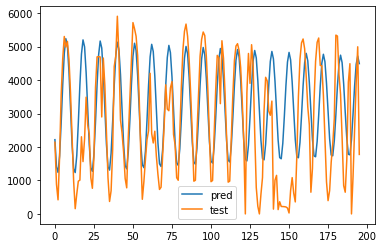

In [33]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(pred.values, label = 'pred')
plt.plot(test.values,label='test')
plt.legend()

# Prerocessing

# df2

In [34]:
df2 = pd.read_csv('df2.csv')
df2 = df2[['Time','Adresse','T1','P_DC']]
df2.head()
df2['Time']= pd.to_datetime(df2['Time'])
df2 = df2.set_index('Time')
df2.head()
df2 = df2.resample('1H').mean()
df2
df2 = df2.between_time('08:00','18:00')
df2 = df2[df2 >= 0]
df2.isna().sum()

Adresse    2100
T1         2113
P_DC       3052
dtype: int64

In [35]:
df2 = df2.dropna()
df2

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    126.0  16.345803   386.204100
2017-04-20 09:00:00    126.0  20.186780  1369.071900
2017-04-20 10:00:00    126.0  22.920427  1768.966333
2017-04-20 11:00:00    126.0  28.280737  3215.782333
2017-04-20 12:00:00    126.0  35.227200  4625.574333
...                      ...        ...          ...
2020-06-01 14:00:00    126.0  51.603443    66.625177
2020-06-01 15:00:00    126.0  46.546127   445.963263
2020-06-01 16:00:00    126.0  43.299690  1724.499980
2020-06-01 17:00:00    126.0  33.912067   911.520533
2020-06-01 18:00:00    126.0  26.195917   196.201460

[9464 rows x 3 columns]

Text(0, 0.5, 'Count')

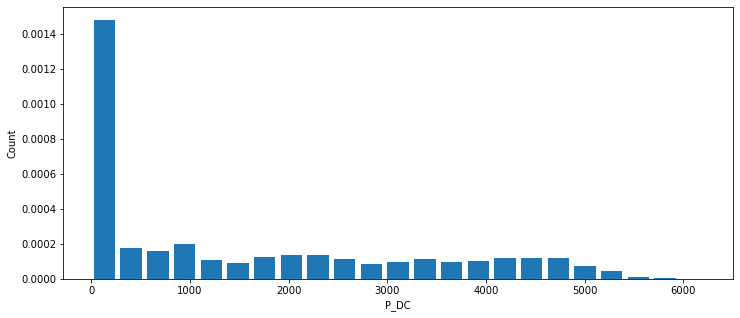

In [36]:
plt.figure(figsize=(12,5))
plt.hist(df2['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

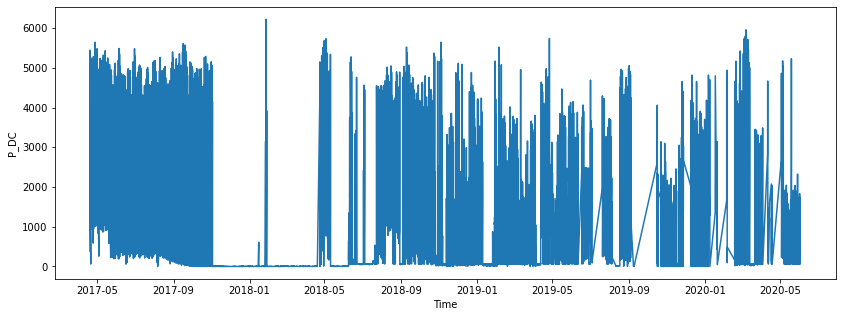

In [37]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df2.index ,y='P_DC' ,data=df2)

In [38]:
mask = (df2.index <= '2017-11-02')
df100 = df2.loc[mask]

In [39]:
mask = (df2.index >= '2018-04-20')
df101 = df2.loc[mask]

In [40]:
df2 = pd.concat([df100,df101])

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

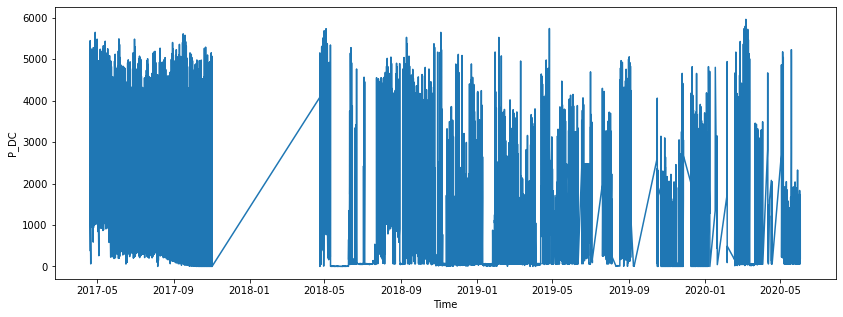

In [41]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df2.index ,y='P_DC' ,data=df2)

In [4]:
def clean_low(df,i,days_hours):
    df_test = df['P_DC'].resample('D').max()
    df_test = df_test.apply(lambda x : 0.0 if x < i else x)
    days = list(df_test[df_test == 0.0].index)

    for i in range(len(days)):
        j = str(days[i])
        j = j[:-8]
        days[i] = j

    hours = ['08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00']

    
    for i in days:
        for j in hours:
            days_hours.append(i+j)
    return days_hours  

In [43]:
days_hour = []
clean_low(df2, 1000,days_hour)

['2018-05-11 08:00:00',
 '2018-05-11 09:00:00',
 '2018-05-11 10:00:00',
 '2018-05-11 11:00:00',
 '2018-05-11 12:00:00',
 '2018-05-11 13:00:00',
 '2018-05-11 14:00:00',
 '2018-05-11 15:00:00',
 '2018-05-11 16:00:00',
 '2018-05-11 17:00:00',
 '2018-05-11 18:00:00',
 '2018-05-12 08:00:00',
 '2018-05-12 09:00:00',
 '2018-05-12 10:00:00',
 '2018-05-12 11:00:00',
 '2018-05-12 12:00:00',
 '2018-05-12 13:00:00',
 '2018-05-12 14:00:00',
 '2018-05-12 15:00:00',
 '2018-05-12 16:00:00',
 '2018-05-12 17:00:00',
 '2018-05-12 18:00:00',
 '2018-05-13 08:00:00',
 '2018-05-13 09:00:00',
 '2018-05-13 10:00:00',
 '2018-05-13 11:00:00',
 '2018-05-13 12:00:00',
 '2018-05-13 13:00:00',
 '2018-05-13 14:00:00',
 '2018-05-13 15:00:00',
 '2018-05-13 16:00:00',
 '2018-05-13 17:00:00',
 '2018-05-13 18:00:00',
 '2018-05-14 08:00:00',
 '2018-05-14 09:00:00',
 '2018-05-14 10:00:00',
 '2018-05-14 11:00:00',
 '2018-05-14 12:00:00',
 '2018-05-14 13:00:00',
 '2018-05-14 14:00:00',
 '2018-05-14 15:00:00',
 '2018-05-14 16:

In [44]:
for i in days_hour:
    df2 = df2[df2.index != i]

In [45]:
df2

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    126.0  16.345803   386.204100
2017-04-20 09:00:00    126.0  20.186780  1369.071900
2017-04-20 10:00:00    126.0  22.920427  1768.966333
2017-04-20 11:00:00    126.0  28.280737  3215.782333
2017-04-20 12:00:00    126.0  35.227200  4625.574333
...                      ...        ...          ...
2020-06-01 14:00:00    126.0  51.603443    66.625177
2020-06-01 15:00:00    126.0  46.546127   445.963263
2020-06-01 16:00:00    126.0  43.299690  1724.499980
2020-06-01 17:00:00    126.0  33.912067   911.520533
2020-06-01 18:00:00    126.0  26.195917   196.201460

[7328 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

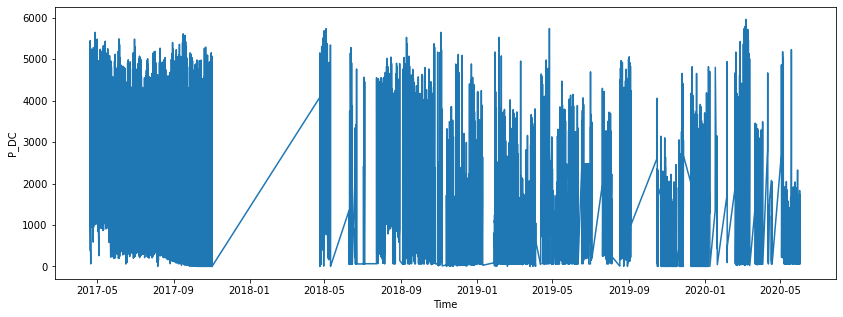

In [46]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df2.index ,y='P_DC' ,data=df2)

# Stationary test

In [47]:
dftest = adfuller(df2['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 1.4084183750613906e-06


# Autocorrelation_ PACF 

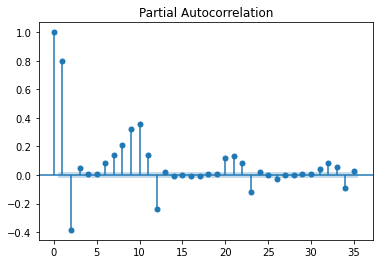

In [48]:
sm.graphics.tsa.plot_pacf(df2['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR  

In [49]:
df_AR1 = df2['P_DC']
train_size = int(len(df2) * 0.95)
test_size = len(df2) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df2)]
print(len(train), len(test))

6961 367


In [50]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 6961
Model:                     AutoReg(3)   Log Likelihood              -57495.583
Method:               Conditional MLE   S.D. of innovations            938.512
Date:                Thu, 26 Aug 2021   AIC                             13.690
Time:                        15:45:06   BIC                             13.695
Sample:                             3   HQIC                            13.692
                                 6961                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    560.9559     19.512     28.750      0.000     522.713     599.198
P_DC.L1        1.1214      0.012     93.599      0.000       1.098       1.145
P_DC.L2       -0.4330      0.017    -25.113      0.0

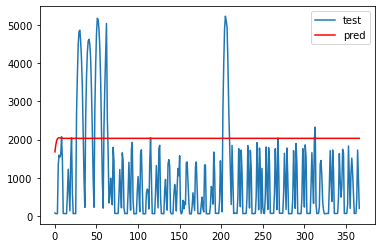

In [51]:
pred = model.predict(start = train_size, end = len(df2)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA

In [52]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=120132.486, Time=6.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=122958.731, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122505.088, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=122341.351, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=122956.731, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=120354.726, Time=3.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=120416.944, Time=6.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=120055.073, Time=8.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=120567.010, Time=6.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=120033.612, Time=9.31 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=120332.297, Time=13.03 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=10.67 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=119362.152, Time=10.35 sec
 ARIMA(1,1,4)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7328
Model:               SARIMAX(2, 1, 4)   Log Likelihood              -59673.108
Date:                Thu, 26 Aug 2021   AIC                         119360.216
Time:                        15:48:03   BIC                         119408.512
Sample:                             0   HQIC                        119376.820
                               - 7328                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6733      0.002    871.159      0.000       1.670       1.677
ar.L2         -0.9905      0.002   -487.229      0.000      -0.994      -0.986
ma.L1         -1.8932      0.009   -216.517      0.000      -1.910      -1.876
ma.L2          0.8590      0.020     43.466      0.000       0.820       0.898
ma.L3          0.5447      0.020     27.751      0.000       0.506       0.583
ma.L4         -0.4591      0.009    -53.175      0.000      -0.476      -0.442
sigma2      6.356e+05   7596.337     83.670      0.000    6.21e+05     6.5e+05
===================================================================================
Ljung-Box (L1) (Q):                  51.24   Jarque-Bera (JB):              1197.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model = ARIMA(train, order=(2,1,4)).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.14856D+00    |proj g|=  1.26157D-02

At iterate    5    f=  8.14852D+00    |proj g|=  1.09990D-02

At iterate   10    f=  8.14845D+00    |proj g|=  5.89040D-04

At iterate   15    f=  8.14844D+00    |proj g|=  5.04468D-03

At iterate   20    f=  8.14843D+00    |proj g|=  6.02540D-04

At iterate   25    f=  8.14842D+00    |proj g|=  2.63913D-03

At iterate   30    f=  8.14842D+00    |proj g|=  2.54552D-04

At iterate   35    f=  8.14842D+00    |proj g|=  2.09077D-04

At iterate   40    f=  8.14842D+00    |proj g|=  2.32703D-05

At iterate   45    f=  8.14842D+00    |proj g|=  6.43396D-04

At iterate   50    f=  8.14842D+00    |proj g|=  1.66622D-04

At iterate   55    f=  8.14841D+00    |proj g|=  1.00844D-03

At iterate   60    f=  8.14841D+00    |proj g|=  1.01252D-05

At iterate   65    f=  8.1

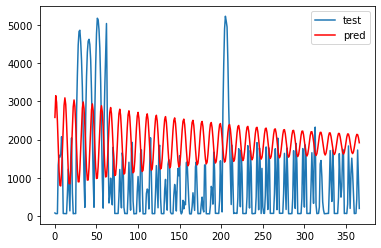

In [54]:
pred = model.predict(start= train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df3

In [55]:
df3 = pd.read_csv('df3.csv')
df3 = df3[['Time','Adresse','T1','P_DC']]
df3['Time']= pd.to_datetime(df3['Time'])
df3 = df3.set_index('Time')
df3 = df3.resample('1H').mean()
df3 = df3.between_time('08:00','18:00')
df3 = df3[df3 >= 0]
df3.isna().sum()

Adresse    5236
T1         5247
P_DC       5236
dtype: int64

In [56]:
df3 = df3.dropna()
df3

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    116.0  16.801183   610.915200
2017-04-20 09:00:00    116.0  19.812383  2031.624000
2017-04-20 10:00:00    116.0  21.770600  2615.184000
2017-04-20 11:00:00    116.0  26.224073  4652.704667
2017-04-20 12:00:00    116.0  31.480727  6724.931333
...                      ...        ...          ...
2020-06-01 14:00:00    116.0  47.939277    37.008370
2020-06-01 15:00:00    116.0  45.153887   590.207100
2020-06-01 16:00:00    116.0  41.238560  1387.706243
2020-06-01 17:00:00    116.0  34.558010   805.936967
2020-06-01 18:00:00    116.0  27.307323   206.664060

[7282 rows x 3 columns]

Text(0, 0.5, 'Count')

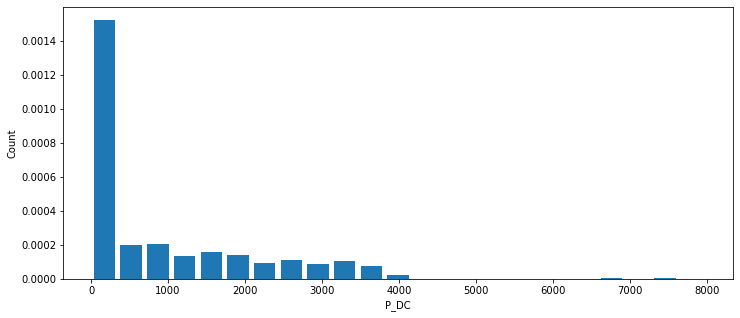

In [57]:
plt.figure(figsize=(12,5))
plt.hist(df3['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

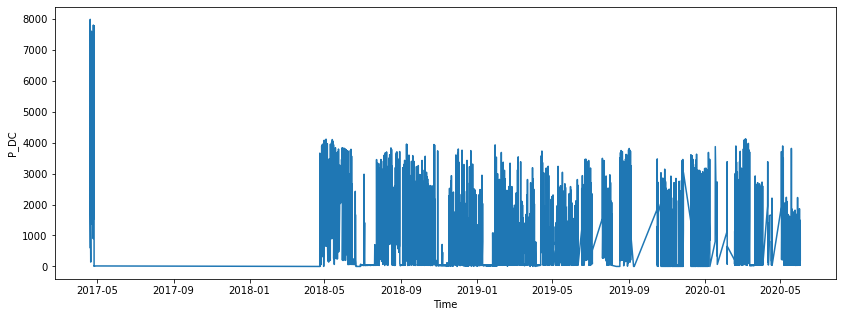

In [58]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df3.index ,y='P_DC' ,data=df3)

In [59]:
mask = (df3.index > '2018-04-20')
df3 = df3.loc[mask]

In [60]:
days_hour = []
clean_low(df3, 1000,days_hour)

['2018-04-20 08:00:00',
 '2018-04-20 09:00:00',
 '2018-04-20 10:00:00',
 '2018-04-20 11:00:00',
 '2018-04-20 12:00:00',
 '2018-04-20 13:00:00',
 '2018-04-20 14:00:00',
 '2018-04-20 15:00:00',
 '2018-04-20 16:00:00',
 '2018-04-20 17:00:00',
 '2018-04-20 18:00:00',
 '2018-06-15 08:00:00',
 '2018-06-15 09:00:00',
 '2018-06-15 10:00:00',
 '2018-06-15 11:00:00',
 '2018-06-15 12:00:00',
 '2018-06-15 13:00:00',
 '2018-06-15 14:00:00',
 '2018-06-15 15:00:00',
 '2018-06-15 16:00:00',
 '2018-06-15 17:00:00',
 '2018-06-15 18:00:00',
 '2018-06-16 08:00:00',
 '2018-06-16 09:00:00',
 '2018-06-16 10:00:00',
 '2018-06-16 11:00:00',
 '2018-06-16 12:00:00',
 '2018-06-16 13:00:00',
 '2018-06-16 14:00:00',
 '2018-06-16 15:00:00',
 '2018-06-16 16:00:00',
 '2018-06-16 17:00:00',
 '2018-06-16 18:00:00',
 '2018-06-17 08:00:00',
 '2018-06-17 09:00:00',
 '2018-06-17 10:00:00',
 '2018-06-17 11:00:00',
 '2018-06-17 12:00:00',
 '2018-06-17 13:00:00',
 '2018-06-17 14:00:00',
 '2018-06-17 15:00:00',
 '2018-06-17 16:

In [61]:
for i in days_hour:
    df3 = df3[df3.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

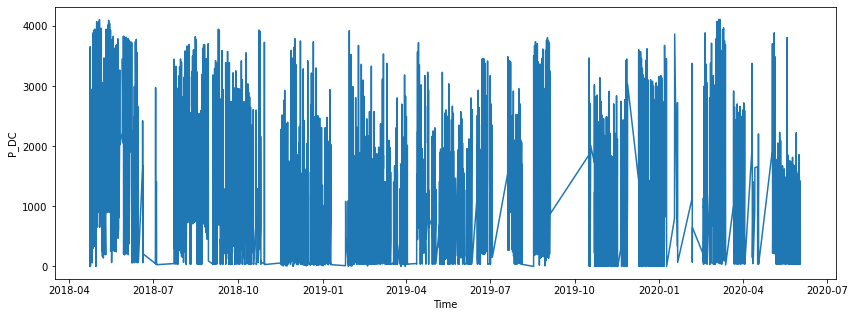

In [62]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df3.index ,y='P_DC' ,data=df3)

# Stationary test

In [63]:
dftest = adfuller(df3['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 4.756250415889439e-10


# Autocorrelation_ PACF 

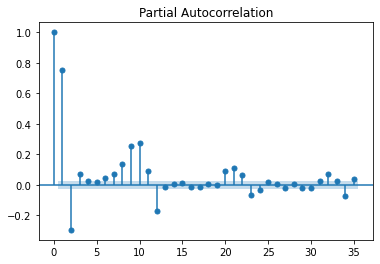

In [64]:
sm.graphics.tsa.plot_pacf(df3['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR  

In [65]:
df_AR1 = df3['P_DC']
train_size = int(len(df3) * 0.95)
test_size = len(df3) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df3)]
print(len(train), len(test))

4904 259


In [66]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4904
Model:                     AutoReg(3)   Log Likelihood              -39326.886
Method:               Conditional MLE   S.D. of innovations            739.016
Date:                Thu, 26 Aug 2021   AIC                             13.213
Time:                        15:49:03   BIC                             13.219
Sample:                             3   HQIC                            13.215
                                 4904                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    371.4795     16.806     22.105      0.000     338.541     404.418
P_DC.L1        0.9980      0.014     70.033      0.000       0.970       1.026
P_DC.L2       -0.3604      0.019    -18.498      0.0

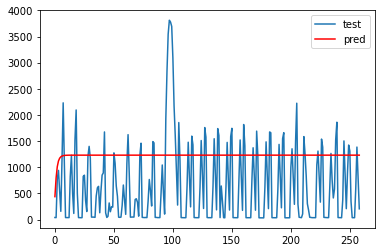

In [67]:
pred = model.predict(start = train_size, end = len(df3)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [68]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=82548.057, Time=4.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=83957.023, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=83864.257, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=83803.364, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=83955.023, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=82647.144, Time=2.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=82546.892, Time=2.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=83757.949, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=83546.937, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=82548.381, Time=4.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=83411.111, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=82544.962, Time=0.77 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=83755.947, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5163
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -41268.481
Date:                Thu, 26 Aug 2021   AIC                          82544.962
Time:                        15:49:32   BIC                          82571.158
Sample:                             0   HQIC                         82554.129
                               - 5163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9149      0.013     71.066      0.000       0.890       0.940
ar.L2         -0.3526      0.013    -27.659      0.000      -0.378      -0.328
ma.L1         -0.9642      0.004   -231.423      0.000      -0.972      -0.956
sigma2      5.148e+05   9909.151     51.953      0.000    4.95e+05    5.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                96.52
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
model = ARIMA(train, order=(2,1,1)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00232D+00    |proj g|=  2.57430D-03

At iterate    5    f=  8.00184D+00    |proj g|=  8.63309D-05


 This problem is unconstrained.



At iterate   10    f=  8.00183D+00    |proj g|=  1.78346D-04

At iterate   15    f=  8.00183D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   1.776D-07   8.002D+00
  F =   8.0018269684477765     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 4903
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -39232.958
Method:                       css-mle   S.D. of innovations   

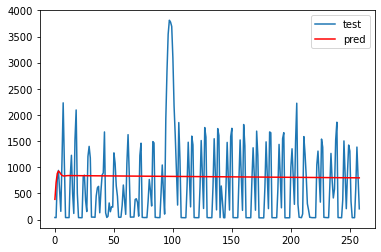

In [70]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df4

In [71]:
df4 = pd.read_csv('df4.csv')
df4 = df4[['Time','Adresse','T1','P_DC']]
df4['Time']= pd.to_datetime(df4['Time'])
df4 = df4.set_index('Time')
df4 = df4.resample('1H').mean()
df4 = df4.between_time('08:00','18:00')
df4 = df4[df4 >= 0]

In [72]:
df4.isna().sum()

Adresse    2100
T1         2101
P_DC       2114
dtype: int64

In [73]:
df4 = df4.dropna()
df4

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    117.0  17.057060   647.491000
2017-04-20 09:00:00    117.0  21.085960  2301.145667
2017-04-20 10:00:00    117.0  23.720537  2983.759000
2017-04-20 11:00:00    117.0  29.547053  5453.987000
2017-04-20 12:00:00    117.0  36.586837  8062.228000
...                      ...        ...          ...
2020-06-01 14:00:00    117.0  31.243193  7370.419667
2020-06-01 15:00:00    117.0  31.950220  5870.132667
2020-06-01 16:00:00    117.0  33.868030  4024.119333
2020-06-01 17:00:00    117.0  32.951083  1869.420467
2020-06-01 18:00:00    117.0  27.909777   436.329167

[10414 rows x 3 columns]

Text(0, 0.5, 'Count')

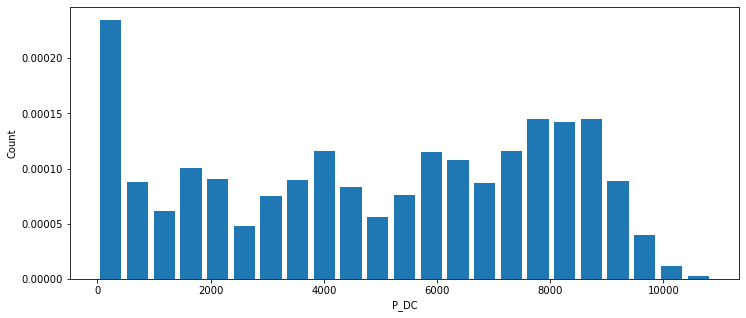

In [74]:
plt.figure(figsize=(12,5))
plt.hist(df4['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [75]:
days_hour = []
clean_low(df4, 1000,days_hour)

['2018-06-30 08:00:00',
 '2018-06-30 09:00:00',
 '2018-06-30 10:00:00',
 '2018-06-30 11:00:00',
 '2018-06-30 12:00:00',
 '2018-06-30 13:00:00',
 '2018-06-30 14:00:00',
 '2018-06-30 15:00:00',
 '2018-06-30 16:00:00',
 '2018-06-30 17:00:00',
 '2018-06-30 18:00:00',
 '2018-07-01 08:00:00',
 '2018-07-01 09:00:00',
 '2018-07-01 10:00:00',
 '2018-07-01 11:00:00',
 '2018-07-01 12:00:00',
 '2018-07-01 13:00:00',
 '2018-07-01 14:00:00',
 '2018-07-01 15:00:00',
 '2018-07-01 16:00:00',
 '2018-07-01 17:00:00',
 '2018-07-01 18:00:00',
 '2018-08-30 08:00:00',
 '2018-08-30 09:00:00',
 '2018-08-30 10:00:00',
 '2018-08-30 11:00:00',
 '2018-08-30 12:00:00',
 '2018-08-30 13:00:00',
 '2018-08-30 14:00:00',
 '2018-08-30 15:00:00',
 '2018-08-30 16:00:00',
 '2018-08-30 17:00:00',
 '2018-08-30 18:00:00',
 '2018-08-31 08:00:00',
 '2018-08-31 09:00:00',
 '2018-08-31 10:00:00',
 '2018-08-31 11:00:00',
 '2018-08-31 12:00:00',
 '2018-08-31 13:00:00',
 '2018-08-31 14:00:00',
 '2018-08-31 15:00:00',
 '2018-08-31 16:

In [76]:
for i in days_hour:
    df4 = df4[df4.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

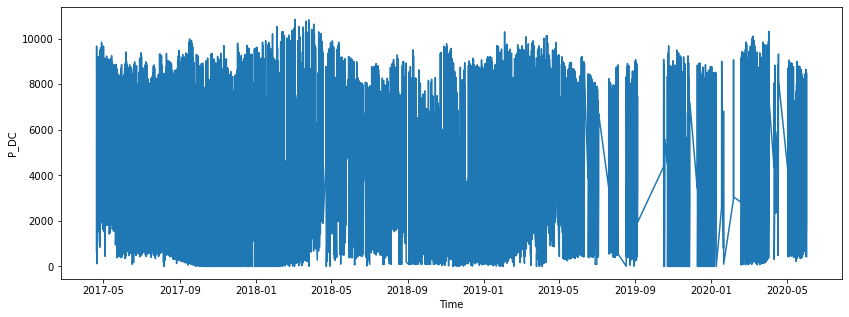

In [77]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df4.index ,y='P_DC' ,data=df4)

# Stationary test

In [78]:
dftest = adfuller(df4['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.5892266108390182e-17


# Autocorrelation_ PACF 

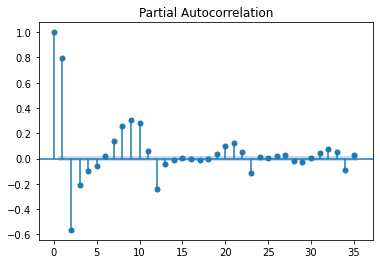

In [79]:
sm.graphics.tsa.plot_pacf(df4['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR 

In [80]:
df_AR1 = df4['P_DC']
train_size = int(len(df4) * 0.95)
test_size = len(df4) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df4)]
print(len(train), len(test))

9756 514


In [81]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 9756
Model:                     AutoReg(5)   Log Likelihood              -84870.087
Method:               Conditional MLE   S.D. of innovations           1457.959
Date:                Thu, 26 Aug 2021   AIC                             14.571
Time:                        15:50:51   BIC                             14.576
Sample:                             5   HQIC                            14.573
                                 9756                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2234.7233     44.251     50.502      0.000    2147.994    2321.453
P_DC.L1        1.1066      0.010    109.448      0.000       1.087       1.126
P_DC.L2       -0.3524      0.015    -23.354      0.0

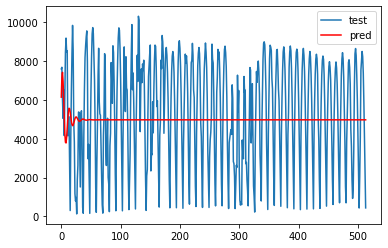

In [82]:
pred = model.predict(start = train_size, end = len(df4)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [83]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=177818.094, Time=16.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=184448.989, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=182609.961, Time=0.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=182721.885, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=184446.989, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=182432.660, Time=8.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=177999.417, Time=22.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=177792.249, Time=19.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=177787.075, Time=30.64 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=177881.892, Time=29.04 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=176507.145, Time=31.81 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=176918.921, Time=29.64 sec
 ARIMA(4,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10270
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -88215.672
Date:                Thu, 26 Aug 2021   AIC                         176449.345
Time:                        15:57:52   BIC                         176514.477
Sample:                             0   HQIC                        176471.362
                              - 10270                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3653      0.481      0.760      0.447      -0.577       1.308
ar.L1          1.6737      0.001   1156.981      0.000       1.671       1.677
ar.L2         -0.9911      0.002   -649.748      0.000      -0.994      -0.988
ma.L1         -1.7874      0.007   -247.099      0.000      -1.802      -1.773
ma.L2          0.8298      0.015     54.806      0.000       0.800       0.859
ma.L3          0.1620      0.017      9.653      0.000       0.129       0.195
ma.L4          0.0544      0.016      3.304      0.001       0.022       0.087
ma.L5         -0.2221      0.008    -27.177      0.000      -0.238      -0.206
sigma2       1.65e+06      3e-06   5.51e+11      0.000    1.65e+06    1.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):              4049.31
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+26. Standard errors may be unstable.
"""

In [84]:
model = ARIMA(train, order=(2,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.58840D+00    |proj g|=  6.10161D-03


 This problem is unconstrained.



At iterate    5    f=  8.58838D+00    |proj g|=  1.42579D-02

At iterate   10    f=  8.58830D+00    |proj g|=  2.22720D-03

At iterate   15    f=  8.58828D+00    |proj g|=  7.28306D-05

At iterate   20    f=  8.58828D+00    |proj g|=  1.28537D-03

At iterate   25    f=  8.58828D+00    |proj g|=  1.76570D-04

At iterate   30    f=  8.58828D+00    |proj g|=  1.24345D-05

At iterate   35    f=  8.58828D+00    |proj g|=  1.13687D-04

At iterate   40    f=  8.58827D+00    |proj g|=  5.94902D-04

At iterate   45    f=  8.58827D+00    |proj g|=  5.37881D-04

At iterate   50    f=  8.58827D+00    |proj g|=  3.55271D-05

At iterate   55    f=  8.58827D+00    |proj g|=  3.01981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

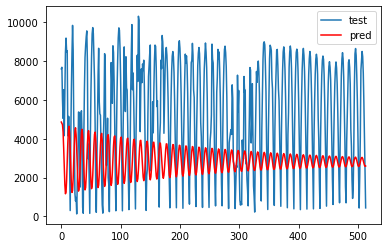

In [85]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df5

In [86]:
df5 = pd.read_csv('df5.csv')
df5 = df5[['Time','Adresse','T1','P_DC']]
df5['Time']= pd.to_datetime(df5['Time'])
df5 = df5.set_index('Time')
df5 = df5.resample('1H').mean()
df5 = df5.between_time('08:00','18:00')
df5 = df5[df5 >= 0]
df5.isna().sum()

Adresse    2100
T1         2105
P_DC       2472
dtype: int64

In [87]:
df5 = df5.dropna()
df5

Adresse         T1          P_DC
Time                                                 
2017-04-20 08:00:00    118.0  16.681657   1026.518167
2017-04-20 09:00:00    118.0  19.502077   3444.295667
2017-04-20 10:00:00    118.0  21.488990   4460.593333
2017-04-20 11:00:00    118.0  25.631893   8059.817667
2017-04-20 12:00:00    118.0  31.070147  11927.970000
...                      ...        ...           ...
2020-06-01 14:00:00    118.0  33.523610  11211.356667
2020-06-01 15:00:00    118.0  34.684910   8805.656333
2020-06-01 16:00:00    118.0  34.901337   5602.024333
2020-06-01 17:00:00    118.0  34.035513   2272.893667
2020-06-01 18:00:00    118.0  29.177380    615.865800

[10052 rows x 3 columns]

Text(0, 0.5, 'Count')

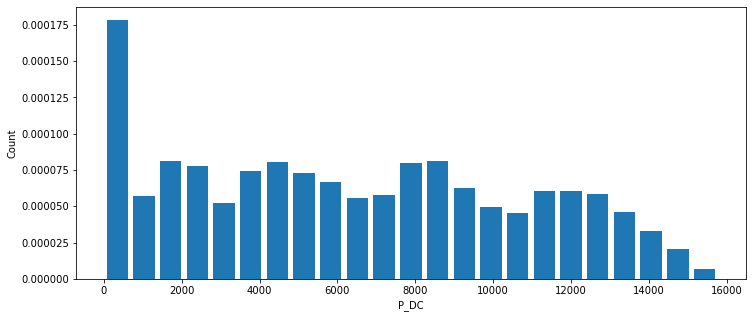

In [88]:
plt.figure(figsize=(12,5))
plt.hist(df5['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [89]:
days_hour = []
clean_low(df5, 2500,days_hour)

['2017-11-28 08:00:00',
 '2017-11-28 09:00:00',
 '2017-11-28 10:00:00',
 '2017-11-28 11:00:00',
 '2017-11-28 12:00:00',
 '2017-11-28 13:00:00',
 '2017-11-28 14:00:00',
 '2017-11-28 15:00:00',
 '2017-11-28 16:00:00',
 '2017-11-28 17:00:00',
 '2017-11-28 18:00:00',
 '2017-12-11 08:00:00',
 '2017-12-11 09:00:00',
 '2017-12-11 10:00:00',
 '2017-12-11 11:00:00',
 '2017-12-11 12:00:00',
 '2017-12-11 13:00:00',
 '2017-12-11 14:00:00',
 '2017-12-11 15:00:00',
 '2017-12-11 16:00:00',
 '2017-12-11 17:00:00',
 '2017-12-11 18:00:00',
 '2017-12-19 08:00:00',
 '2017-12-19 09:00:00',
 '2017-12-19 10:00:00',
 '2017-12-19 11:00:00',
 '2017-12-19 12:00:00',
 '2017-12-19 13:00:00',
 '2017-12-19 14:00:00',
 '2017-12-19 15:00:00',
 '2017-12-19 16:00:00',
 '2017-12-19 17:00:00',
 '2017-12-19 18:00:00',
 '2018-03-05 08:00:00',
 '2018-03-05 09:00:00',
 '2018-03-05 10:00:00',
 '2018-03-05 11:00:00',
 '2018-03-05 12:00:00',
 '2018-03-05 13:00:00',
 '2018-03-05 14:00:00',
 '2018-03-05 15:00:00',
 '2018-03-05 16:

In [90]:
for i in days_hour:
    df5 = df5[df5.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

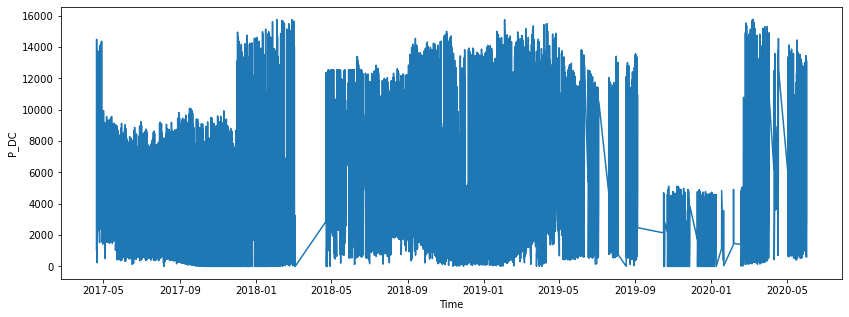

In [91]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df5.index ,y='P_DC' ,data=df5)

# Stationary test

In [92]:
dftest = adfuller(df5['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 4.4721136774773174e-10


# Autocorrelation_ PACF

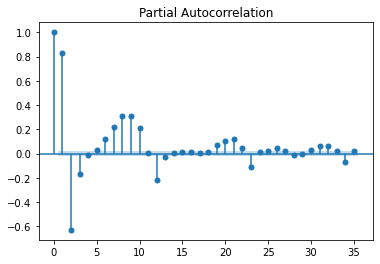

In [93]:
sm.graphics.tsa.plot_pacf(df5['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR  

In [94]:
df_AR1 = df5['P_DC']
train_size = int(len(df5) * 0.95)
test_size = len(df5) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df5)]
print(len(train), len(test))

9303 490


In [95]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 9303
Model:                     AutoReg(5)   Log Likelihood              -82873.330
Method:               Conditional MLE   S.D. of innovations           1797.387
Date:                Thu, 26 Aug 2021   AIC                             14.990
Time:                        15:59:18   BIC                             14.995
Sample:                             5   HQIC                            14.992
                                 9303                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1994.5676     49.588     40.223      0.000    1897.377    2091.758
P_DC.L1        1.2585      0.010    121.438      0.000       1.238       1.279
P_DC.L2       -0.4185      0.017    -25.125      0.0

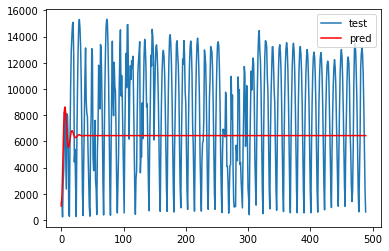

In [96]:
pred = model.predict(start = train_size, end = len(df5)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [97]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=173170.774, Time=7.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=180926.477, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=178217.879, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=178532.923, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=180924.477, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=174609.844, Time=6.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=173314.907, Time=8.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=173145.508, Time=10.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=173141.706, Time=14.53 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=173217.643, Time=12.84 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=172063.232, Time=15.64 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=172591.944, Time=10.28 sec
 ARIMA(4,1,4)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9793
Model:               SARIMAX(3, 1, 5)   Log Likelihood              -85977.935
Date:                Thu, 26 Aug 2021   AIC                         171973.871
Time:                        16:03:41   BIC                         172038.575
Sample:                             0   HQIC                        171995.796
                               - 9793                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9555      0.026     73.955      0.000       1.904       2.007
ar.L2         -1.4632      0.044    -33.148      0.000      -1.550      -1.377
ar.L3          0.2789      0.026     10.701      0.000       0.228       0.330
ma.L1         -1.9706      0.026    -74.747      0.000      -2.022      -1.919
ma.L2          1.2014      0.047     25.470      0.000       1.109       1.294
ma.L3         -0.0770      0.025     -3.038      0.002      -0.127      -0.027
ma.L4          0.0493      0.020      2.473      0.013       0.010       0.088
ma.L5         -0.1750      0.012    -14.241      0.000      -0.199      -0.151
sigma2      2.403e+06   4.07e-09    5.9e+14      0.000     2.4e+06     2.4e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             10928.39
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.54e+30. Standard errors may be unstable.
"""

In [98]:
model = ARIMA(train, order=(3,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.76823D+00    |proj g|=  8.22311D-03


 This problem is unconstrained.



At iterate    5    f=  8.76759D+00    |proj g|=  7.45555D-03

At iterate   10    f=  8.76713D+00    |proj g|=  1.52873D-03

At iterate   15    f=  8.76686D+00    |proj g|=  1.12212D-03

At iterate   20    f=  8.76685D+00    |proj g|=  2.34657D-04

At iterate   25    f=  8.76685D+00    |proj g|=  1.13687D-05

At iterate   30    f=  8.76685D+00    |proj g|=  7.95808D-05

At iterate   35    f=  8.76684D+00    |proj g|=  3.76232D-04

At iterate   40    f=  8.76684D+00    |proj g|=  1.27898D-05

At iterate   45    f=  8.76684D+00    |proj g|=  1.79412D-05

At iterate   50    f=  8.76684D+00    |proj g|=  1.31450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

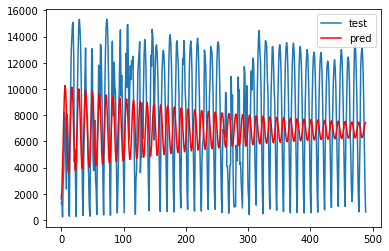

In [99]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df6

In [100]:
df6 = pd.read_csv('df6.csv')
df6 = df6[['Time','Adresse','T1','P_DC']]
df6['Time']= pd.to_datetime(df6['Time'])
df6 = df6.set_index('Time')
df6 = df6.resample('1H').mean()
df6 = df6.between_time('08:00','18:00')
df6 = df6[df6 >= 0]
df6.isna().sum()

Adresse    2100
T1         2109
P_DC       2891
dtype: int64

In [101]:
df6 = df6.dropna()
df6

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    119.0  17.029307   387.415000
2017-04-20 09:00:00    119.0  20.307003  1322.002793
2017-04-20 10:00:00    119.0  22.793883  1699.054333
2017-04-20 11:00:00    119.0  27.560307  3192.866667
2017-04-20 12:00:00    119.0  33.359870  4749.039000
...                      ...        ...          ...
2020-06-01 14:00:00    119.0  48.044317  4491.259000
2020-06-01 15:00:00    119.0  45.391480  3425.523667
2020-06-01 16:00:00    119.0  41.742963  2194.009667
2020-06-01 17:00:00    119.0  34.685573   986.367133
2020-06-01 18:00:00    119.0  27.037757   241.469847

[9629 rows x 3 columns]

Text(0, 0.5, 'Count')

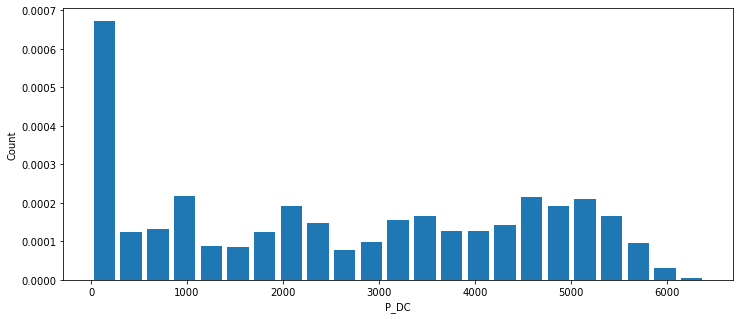

In [102]:
plt.figure(figsize=(12,5))
plt.hist(df6['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [103]:
days_hour = []
clean_low(df6, 1000,days_hour)

['2017-09-30 08:00:00',
 '2017-09-30 09:00:00',
 '2017-09-30 10:00:00',
 '2017-09-30 11:00:00',
 '2017-09-30 12:00:00',
 '2017-09-30 13:00:00',
 '2017-09-30 14:00:00',
 '2017-09-30 15:00:00',
 '2017-09-30 16:00:00',
 '2017-09-30 17:00:00',
 '2017-09-30 18:00:00',
 '2017-10-01 08:00:00',
 '2017-10-01 09:00:00',
 '2017-10-01 10:00:00',
 '2017-10-01 11:00:00',
 '2017-10-01 12:00:00',
 '2017-10-01 13:00:00',
 '2017-10-01 14:00:00',
 '2017-10-01 15:00:00',
 '2017-10-01 16:00:00',
 '2017-10-01 17:00:00',
 '2017-10-01 18:00:00',
 '2017-10-02 08:00:00',
 '2017-10-02 09:00:00',
 '2017-10-02 10:00:00',
 '2017-10-02 11:00:00',
 '2017-10-02 12:00:00',
 '2017-10-02 13:00:00',
 '2017-10-02 14:00:00',
 '2017-10-02 15:00:00',
 '2017-10-02 16:00:00',
 '2017-10-02 17:00:00',
 '2017-10-02 18:00:00',
 '2017-10-03 08:00:00',
 '2017-10-03 09:00:00',
 '2017-10-03 10:00:00',
 '2017-10-03 11:00:00',
 '2017-10-03 12:00:00',
 '2017-10-03 13:00:00',
 '2017-10-03 14:00:00',
 '2017-10-03 15:00:00',
 '2017-10-03 16:

In [104]:
for i in days_hour:
    df6 = df6[df6.index != i]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

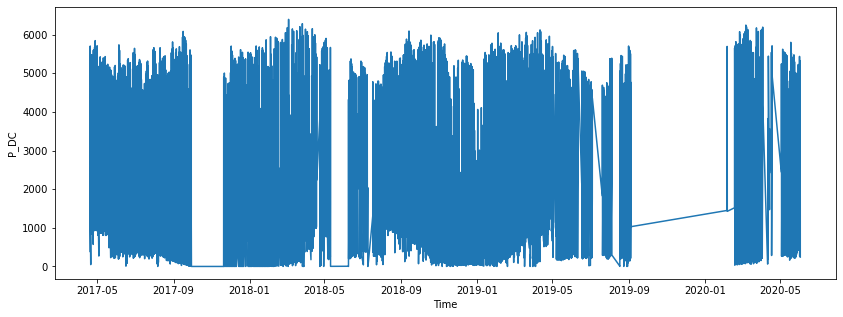

In [105]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df6.index ,y='P_DC' ,data=df6)

# Stationary test

In [106]:
dftest = adfuller(df6['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 1.2511399764375982e-17


 # Autocorrelation_ PACF

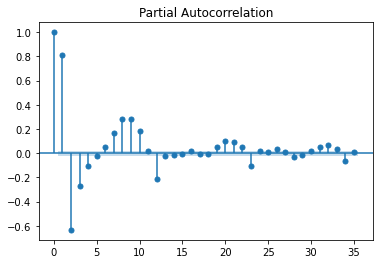

In [107]:
sm.graphics.tsa.plot_pacf(df6['P_DC'].squeeze(), lags = 35)
plt.show()

# Auto regression model / AR 

In [108]:
df_AR1 = df6['P_DC']
train_size = int(len(df6) * 0.95)
test_size = len(df6) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df6)]
print(len(train), len(test))

8170 431


In [109]:
model = AutoReg(train, lags = 6).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 8170
Model:                     AutoReg(6)   Log Likelihood              -65888.000
Method:               Conditional MLE   S.D. of innovations            774.033
Date:                Thu, 26 Aug 2021   AIC                             13.305
Time:                        16:05:15   BIC                             13.312
Sample:                             6   HQIC                            13.308
                                 8170                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1202.3442     30.401     39.549      0.000    1142.759    1261.929
P_DC.L1        1.1359      0.011    102.762      0.000       1.114       1.158
P_DC.L2       -0.3176      0.017    -18.991      0.0

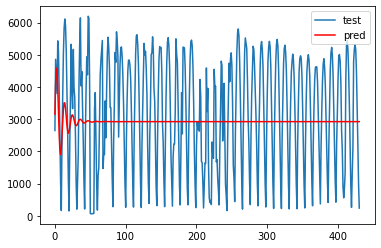

In [110]:
pred = model.predict(start = train_size, end = len(df6)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [111]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=138145.057, Time=8.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=144967.245, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=142718.980, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=143050.947, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=144965.245, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=138187.594, Time=7.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=138064.916, Time=6.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.99 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=138066.704, Time=8.37 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=137585.866, Time=9.62 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=10.21 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=137165.357, Time=13.71 sec
 ARIMA(4,1,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8601
Model:               SARIMAX(3, 1, 5)   Log Likelihood              -68557.159
Date:                Thu, 26 Aug 2021   AIC                         137132.317
Time:                        16:08:46   BIC                         137195.853
Sample:                             0   HQIC                        137153.986
                               - 8601                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0508      0.031     65.167      0.000       1.989       2.113
ar.L2         -1.6221      0.052    -30.932      0.000      -1.725      -1.519
ar.L3          0.3735      0.031     12.076      0.000       0.313       0.434
ma.L1         -2.1097      0.032    -66.329      0.000      -2.172      -2.047
ma.L2          1.4690      0.058     25.390      0.000       1.356       1.582
ma.L3         -0.2292      0.032     -7.227      0.000      -0.291      -0.167
ma.L4          0.0141      0.024      0.585      0.558      -0.033       0.061
ma.L5         -0.1261      0.015     -8.324      0.000      -0.156      -0.096
sigma2      4.849e+05   4935.264     98.255      0.000    4.75e+05    4.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7437.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
model = ARIMA(train, order=(3,1,5)).fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96845D+00    |proj g|=  7.55014D-03

At iterate    5    f=  7.96736D+00    |proj g|=  1.16804D-02

At iterate   10    f=  7.96626D+00    |proj g|=  6.19007D-03

At iterate   15    f=  7.96588D+00    |proj g|=  7.80069D-03

At iterate   20    f=  7.96579D+00    |proj g|=  1.92140D-03

At iterate   25    f=  7.96570D+00    |proj g|=  1.30266D-02

At iterate   30    f=  7.96569D+00    |proj g|=  6.45883D-04

At iterate   35    f=  7.96569D+00    |proj g|=  5.20473D-05

At iterate   40    f=  7.96568D+00    |proj g|=  1.43086D-04

At iterate   45    f=  7.96568D+00    |proj g|=  1.42792D-03

At iterate   50    f=  7.96568D+00    |proj g|=  7.01661D-05

At iterate   55    f=  7.96568D+00    |proj g|=  3.10951D-04

At iterate   60    f=  7.96568D+00    |proj g|=  7.92255D-05

At iterate   65    f=  7.9

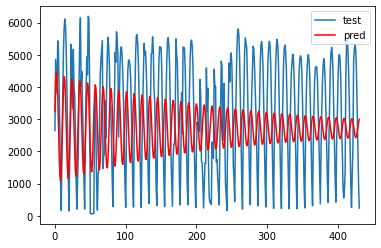

In [113]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df7

In [114]:
df7 = pd.read_csv('df7.csv')
df7 = df7[['Time','Adresse','T1','P_DC']]
df7['Time']= pd.to_datetime(df7['Time'])
df7 = df7.set_index('Time')
df7 = df7.resample('1H').mean()
df7 = df7.between_time('08:00','18:00')
df7 = df7[df7 >= 0]
df7.isna().sum()

Adresse    2100
T1         2108
P_DC       2158
dtype: int64

In [115]:
df7 = df7.dropna()
df7

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    120.0  16.727000   271.481767
2017-04-20 09:00:00    120.0  19.638576   989.085724
2017-04-20 10:00:00    120.0  21.685783  1279.716367
2017-04-20 11:00:00    120.0  25.969890  2353.997333
2017-04-20 12:00:00    120.0  31.594667  3455.033667
...                      ...        ...          ...
2020-06-01 14:00:00    120.0  32.391460     0.000000
2020-06-01 15:00:00    120.0  33.137923     0.000000
2020-06-01 16:00:00    120.0  33.593710     0.000000
2020-06-01 17:00:00    120.0  31.712987     0.000000
2020-06-01 18:00:00    120.0  27.317810     0.000000

[10363 rows x 3 columns]

Text(0, 0.5, 'Count')

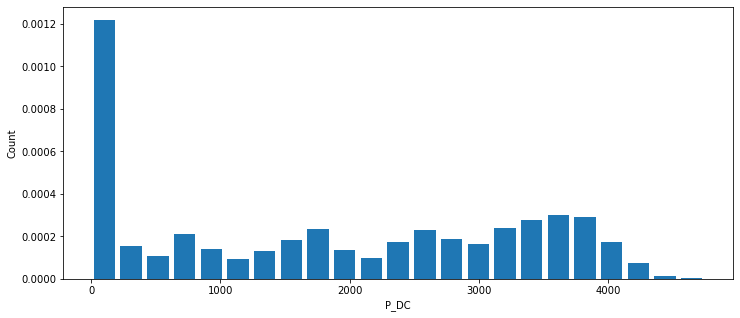

In [116]:
plt.figure(figsize=(12,5))
plt.hist(df7['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

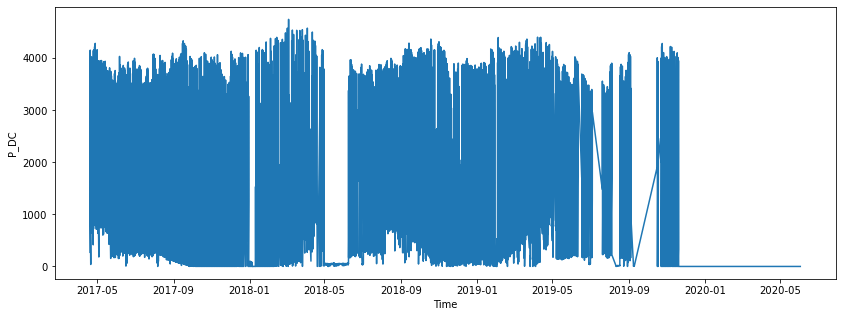

In [117]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df7.index ,y='P_DC' ,data=df7)

In [118]:
mask = (df7.index < '2019-12-01')
df7 = df7.loc[mask]

In [119]:
days_hour = []
clean_low(df7, 1000,days_hour)
for i in days_hour:
    df7 = df7[df7.index != i]
df7

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    120.0  16.727000   271.481767
2017-04-20 09:00:00    120.0  19.638576   989.085724
2017-04-20 10:00:00    120.0  21.685783  1279.716367
2017-04-20 11:00:00    120.0  25.969890  2353.997333
2017-04-20 12:00:00    120.0  31.594667  3455.033667
...                      ...        ...          ...
2019-11-19 14:00:00    120.0  19.602207    80.057300
2019-11-19 15:00:00    120.0  17.642517     0.000000
2019-11-19 16:00:00    120.0  16.107527     0.000000
2019-11-19 17:00:00    120.0  14.893943     0.000000
2019-11-19 18:00:00    120.0  13.526713     0.000000

[8463 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

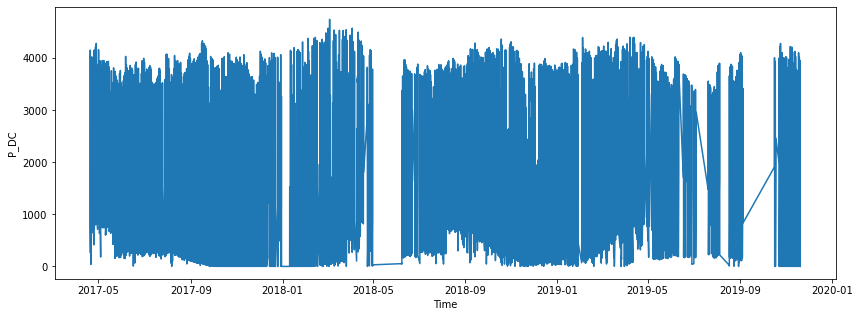

In [120]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df7.index ,y='P_DC' ,data=df7)

# Stationary test

In [121]:
dftest = adfuller(df7['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 6.039274999653486e-20


 # Autocorrelation_ PACF  

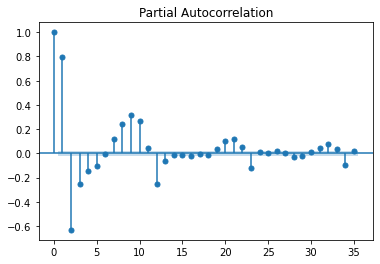

In [122]:
sm.graphics.tsa.plot_pacf(df7['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR   

In [123]:
df_AR1 = df7['P_DC']
train_size = int(len(df7) * 0.95)
test_size = len(df7) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df7)]
print(len(train), len(test))

8039 424


In [124]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 8039
Model:                     AutoReg(5)   Log Likelihood              -62449.365
Method:               Conditional MLE   S.D. of innovations            574.900
Date:                Thu, 26 Aug 2021   AIC                             12.710
Time:                        16:10:12   BIC                             12.716
Sample:                             5   HQIC                            12.712
                                 8039                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1156.9628     22.086     52.385      0.000    1113.675    1200.250
P_DC.L1        1.0930      0.011     98.362      0.000       1.071       1.115
P_DC.L2       -0.3518      0.016    -21.332      0.0

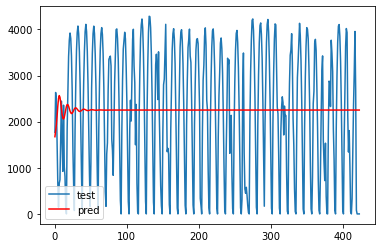

In [125]:
pred = model.predict(start = train_size, end = len(df7)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA

In [126]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=131113.328, Time=6.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=137641.062, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=135568.871, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=135779.522, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=137639.062, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=135360.677, Time=2.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.82 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=131209.031, Time=7.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=135488.850, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=131763.714, Time=6.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=131003.242, Time=11.20 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=130673.020, Time=13.42 sec
 ARIMA(4,1,2)(0,0,0)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8463
Model:               SARIMAX(4, 1, 4)   Log Likelihood              -65055.788
Date:                Thu, 26 Aug 2021   AIC                         130131.576
Time:                        16:13:53   BIC                         130202.010
Sample:                             0   HQIC                        130155.617
                               - 8463                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0317      0.040     -0.801      0.423      -0.109       0.046
ar.L1          1.4026      0.011    132.689      0.000       1.382       1.423
ar.L2          0.1582      0.015     10.799      0.000       0.129       0.187
ar.L3         -1.4307      0.015    -97.670      0.000      -1.459      -1.402
ar.L4          0.6856      0.010     66.601      0.000       0.665       0.706
ma.L1         -1.6038      0.007   -215.278      0.000      -1.618      -1.589
ma.L2         -0.1104      0.012     -9.133      0.000      -0.134      -0.087
ma.L3          1.5696      0.012    132.608      0.000       1.546       1.593
ma.L4         -0.8488      0.006   -139.089      0.000      -0.861      -0.837
sigma2      2.604e+05   2842.955     91.601      0.000    2.55e+05    2.66e+05
===================================================================================
Ljung-Box (L1) (Q):                  86.83   Jarque-Bera (JB):              4193.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
model = ARIMA(train, order=(2,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66595D+00    |proj g|=  9.13962D-03


 This problem is unconstrained.



At iterate    5    f=  7.66562D+00    |proj g|=  3.56799D-03

At iterate   10    f=  7.66557D+00    |proj g|=  5.68434D-05

At iterate   15    f=  7.66557D+00    |proj g|=  2.00204D-03

At iterate   20    f=  7.66557D+00    |proj g|=  1.29496D-04

At iterate   25    f=  7.66557D+00    |proj g|=  2.54818D-04

At iterate   30    f=  7.66557D+00    |proj g|=  1.50280D-04

At iterate   35    f=  7.66557D+00    |proj g|=  1.59961D-04

At iterate   40    f=  7.66557D+00    |proj g|=  4.97380D-05

At iterate   45    f=  7.66557D+00    |proj g|=  1.33227D-05

At iterate   50    f=  7.66557D+00    |proj g|=  2.87770D-05

At iterate   55    f=  7.66557D+00    |proj g|=  1.89182D-05

At iterate   60    f=  7.66557D+00    |proj g|=  3.58824D-05

At iterate   65    f=  7.66557D+00    |proj g|=  2.30926D-06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     69    123      2     0     0   4.352D-06   7.666D+00
  F =   7.6655691945515372     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 8038
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -61615.845
Method:                       css-mle   S.D. of innovations            516.099
Date:                Thu, 26 Aug 2021   AIC                         123249.690
Time:                       

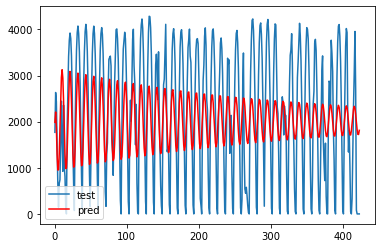

In [128]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df8

In [129]:
df8 = pd.read_csv('df8.csv')
df8 = df8[['Time','Adresse','T1','P_DC']]
df8['Time']= pd.to_datetime(df8['Time'])
df8 = df8.set_index('Time')
df8 = df8.resample('1H').mean()
df8 = df8.between_time('08:00','18:00')
df8 = df8[df8 >= 0]
df8.isna().sum()

Adresse    2100
T1         2102
P_DC       2233
dtype: int64

In [130]:
df8 = df8.dropna()
df8

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    122.0  17.182603   306.391200
2017-04-20 09:00:00    122.0  20.784786  1059.723069
2017-04-20 10:00:00    122.0  23.763507  1359.848233
2017-04-20 11:00:00    122.0  29.108287  2544.040667
2017-04-20 12:00:00    122.0  35.580040  3742.613333
...                      ...        ...          ...
2020-06-01 14:00:00    122.0  33.626543  4176.695667
2020-06-01 15:00:00    122.0  33.243060  3195.955667
2020-06-01 16:00:00    122.0  33.319587  2038.757667
2020-06-01 17:00:00    122.0  32.355277   894.529967
2020-06-01 18:00:00    122.0  26.799510   218.298967

[10294 rows x 3 columns]

Text(0, 0.5, 'Count')

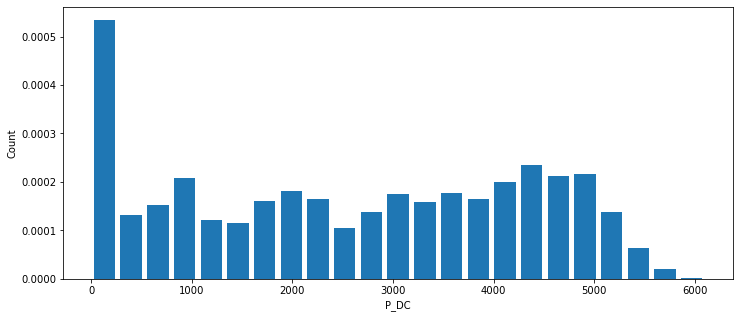

In [131]:
plt.figure(figsize=(12,5))
plt.hist(df8['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

In [132]:
days_hour = []
clean_low(df8, 1000,days_hour)
for i in days_hour:
    df8 = df8[df8.index != i]
df8

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    122.0  17.182603   306.391200
2017-04-20 09:00:00    122.0  20.784786  1059.723069
2017-04-20 10:00:00    122.0  23.763507  1359.848233
2017-04-20 11:00:00    122.0  29.108287  2544.040667
2017-04-20 12:00:00    122.0  35.580040  3742.613333
...                      ...        ...          ...
2020-06-01 14:00:00    122.0  33.626543  4176.695667
2020-06-01 15:00:00    122.0  33.243060  3195.955667
2020-06-01 16:00:00    122.0  33.319587  2038.757667
2020-06-01 17:00:00    122.0  32.355277   894.529967
2020-06-01 18:00:00    122.0  26.799510   218.298967

[9911 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

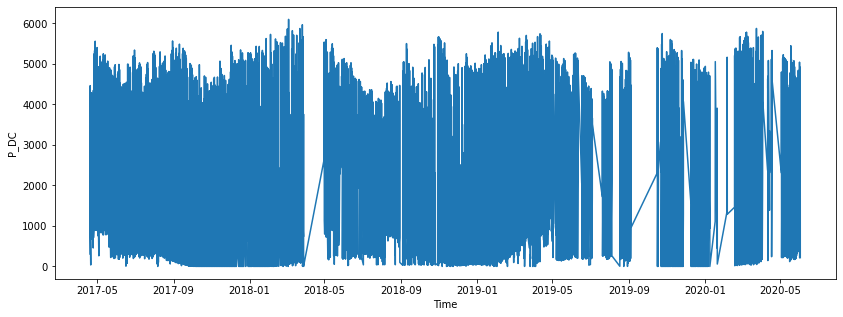

In [133]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df8.index ,y='P_DC' ,data=df8)

 # Stationary test

In [134]:
dftest = adfuller(df8['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.1497109666892722e-16


  # Autocorrelation_ PACF  

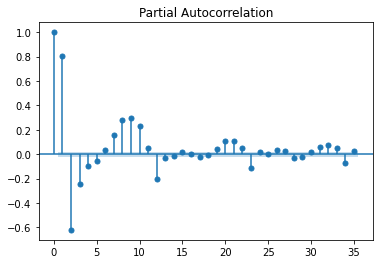

In [135]:
sm.graphics.tsa.plot_pacf(df8['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR   

In [136]:
df_AR1 = df8['P_DC']
train_size = int(len(df8) * 0.95)
test_size = len(df8) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df8)]
print(len(train), len(test))

9415 496


In [137]:
model = AutoReg(train, lags = 4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 9415
Model:                     AutoReg(4)   Log Likelihood              -75682.736
Method:               Conditional MLE   S.D. of innovations            752.202
Date:                Thu, 26 Aug 2021   AIC                             13.247
Time:                        16:15:31   BIC                             13.252
Sample:                             4   HQIC                            13.249
                                 9415                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1156.5563     20.341     56.858      0.000    1116.689    1196.424
P_DC.L1        1.1329      0.010    110.477      0.000       1.113       1.153
P_DC.L2       -0.3407      0.015    -21.997      0.0

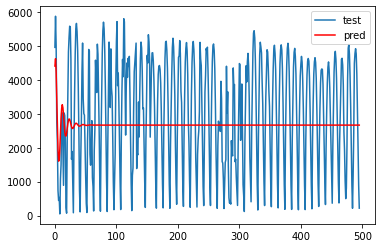

In [138]:
pred = model.predict(start = train_size, end = len(df8)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [139]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=158445.084, Time=11.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=166064.957, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=163673.311, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=163960.407, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=166062.957, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=163459.868, Time=1.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=158632.686, Time=10.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=158432.607, Time=15.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=11.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=158437.459, Time=13.92 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=157774.571, Time=14.81 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=15.81 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=157280.013, Time=17.00 sec
 ARIMA(4,1,4)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9911
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -78615.215
Date:                Thu, 26 Aug 2021   AIC                         157248.430
Time:                        16:19:09   BIC                         157313.242
Sample:                             0   HQIC                        157270.379
                               - 9911                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0791      0.230     -0.344      0.731      -0.530       0.372
ar.L1          1.6732      0.002    954.754      0.000       1.670       1.677
ar.L2         -0.9911      0.002   -546.532      0.000      -0.995      -0.988
ma.L1         -1.7681      0.007   -246.369      0.000      -1.782      -1.754
ma.L2          0.8171      0.014     56.351      0.000       0.789       0.845
ma.L3          0.1195      0.016      7.306      0.000       0.087       0.152
ma.L4          0.1003      0.016      6.203      0.000       0.069       0.132
ma.L5         -0.2361      0.008    -29.270      0.000      -0.252      -0.220
sigma2      4.499e+05   4343.201    103.596      0.000    4.41e+05    4.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.90   Jarque-Bera (JB):              8337.83
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
model = ARIMA(train, order=(2,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92931D+00    |proj g|=  4.27702D-03


 This problem is unconstrained.



At iterate    5    f=  7.92929D+00    |proj g|=  1.34201D-02

At iterate   10    f=  7.92923D+00    |proj g|=  2.06368D-03

At iterate   15    f=  7.92920D+00    |proj g|=  2.95133D-03

At iterate   20    f=  7.92919D+00    |proj g|=  2.84217D-05

At iterate   25    f=  7.92919D+00    |proj g|=  9.65450D-05

At iterate   30    f=  7.92919D+00    |proj g|=  1.05427D-04

At iterate   35    f=  7.92919D+00    |proj g|=  3.97105D-04

At iterate   40    f=  7.92919D+00    |proj g|=  7.72715D-06

At iterate   45    f=  7.92919D+00    |proj g|=  2.13163D-06

At iterate   50    f=  7.92919D+00    |proj g|=  9.76996D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

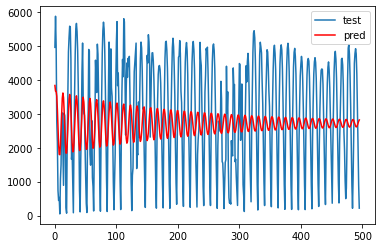

In [141]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df9

In [142]:
df9 = pd.read_csv('df9.csv')
df9 = df9[['Time','Adresse','T1','P_DC']]
df9['Time']= pd.to_datetime(df9['Time'])
df9 = df9.set_index('Time')
df9 = df9.resample('1H').mean()
df9 = df9.between_time('08:00','18:00')
df9 = df9[df9 >= 0]
df9.isna().sum()

Adresse    2100
T1         2110
P_DC       4438
dtype: int64

In [143]:
df9 = df9.dropna()
df9

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    125.0  17.165667   839.030067
2017-04-20 09:00:00    125.0  21.134869  2832.072759
2017-04-20 10:00:00    125.0  23.237013  3407.287000
2017-04-20 11:00:00    125.0  28.929960  5819.508667
2017-04-20 12:00:00    125.0  35.181963  8266.258667
...                      ...        ...          ...
2020-06-01 14:00:00    125.0  48.882783    92.852770
2020-06-01 15:00:00    125.0  45.916930   735.357220
2020-06-01 16:00:00    125.0  42.618343  2084.128820
2020-06-01 17:00:00    125.0  35.659763  1539.822867
2020-06-01 18:00:00    125.0  27.504680   439.376833

[8081 rows x 3 columns]

Text(0, 0.5, 'Count')

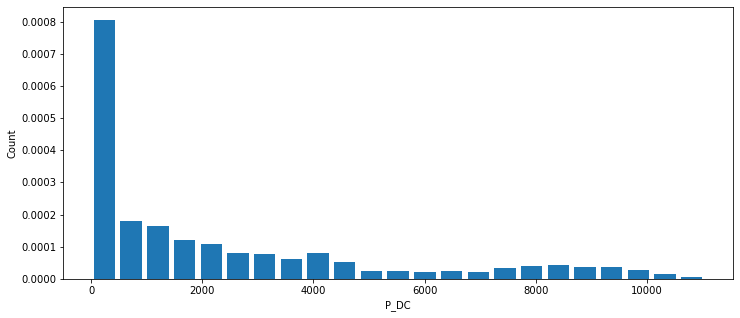

In [144]:
plt.figure(figsize=(12,5))
plt.hist(df9['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

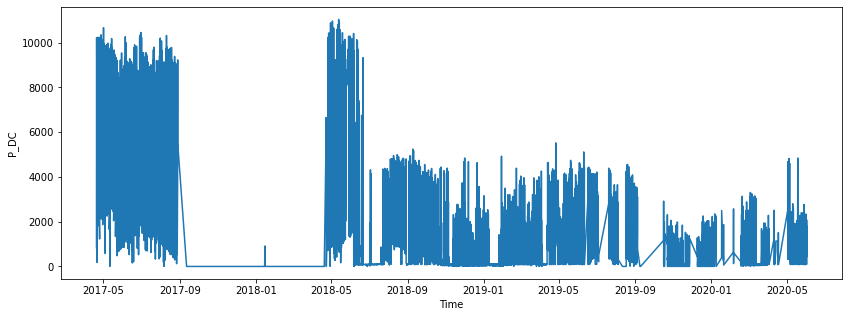

In [145]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df9.index ,y='P_DC' ,data=df9)

In [146]:
days_hour = []
clean_low(df9, 1800,days_hour)
for i in days_hour:
    df9 = df9[df9.index != i]
df9

Adresse         T1         P_DC
Time                                                
2017-04-20 08:00:00    125.0  17.165667   839.030067
2017-04-20 09:00:00    125.0  21.134869  2832.072759
2017-04-20 10:00:00    125.0  23.237013  3407.287000
2017-04-20 11:00:00    125.0  28.929960  5819.508667
2017-04-20 12:00:00    125.0  35.181963  8266.258667
...                      ...        ...          ...
2020-06-01 14:00:00    125.0  48.882783    92.852770
2020-06-01 15:00:00    125.0  45.916930   735.357220
2020-06-01 16:00:00    125.0  42.618343  2084.128820
2020-06-01 17:00:00    125.0  35.659763  1539.822867
2020-06-01 18:00:00    125.0  27.504680   439.376833

[5945 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

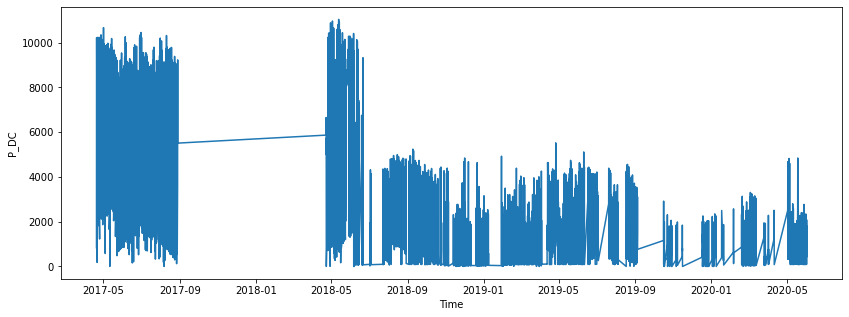

In [147]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df9.index ,y='P_DC' ,data=df9)

  # Stationary test

In [148]:
dftest = adfuller(df9['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 0.03384118514699092


 # Autocorrelation_ PACF  

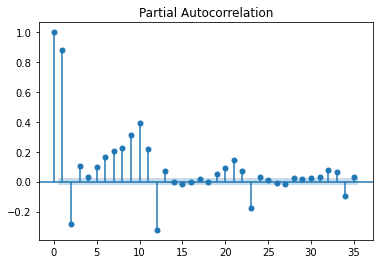

In [149]:
sm.graphics.tsa.plot_pacf(df9['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [150]:
df_AR1 = df9['P_DC']
train_size = int(len(df9) * 0.95)
test_size = len(df9) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df9)]
print(len(train), len(test))

5647 298


In [151]:
model = AutoReg(train, lags = 5).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 5647
Model:                     AutoReg(5)   Log Likelihood              -48721.324
Method:               Conditional MLE   S.D. of innovations           1361.758
Date:                Thu, 26 Aug 2021   AIC                             14.436
Time:                        16:20:42   BIC                             14.444
Sample:                             5   HQIC                            14.438
                                 5647                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    383.6070     28.730     13.352      0.000     327.297     439.917
P_DC.L1        1.1546      0.013     87.154      0.000       1.129       1.181
P_DC.L2       -0.3923      0.020    -19.353      0.0

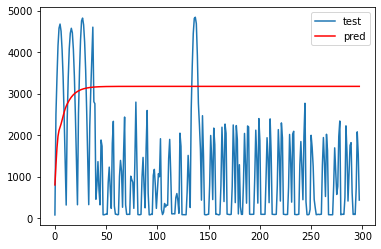

In [152]:
pred = model.predict(start = train_size, end = len(df9)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [153]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=101233.838, Time=4.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=103487.925, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=103230.365, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=103133.587, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=103485.925, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=101908.715, Time=2.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=101636.763, Time=3.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=101316.567, Time=8.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=101940.379, Time=7.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=103111.069, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=101814.143, Time=3.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=101593.039, Time=4.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=101149.779, Time=7.51 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=101450.242, Time=8.84 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5945
Model:               SARIMAX(3, 1, 4)   Log Likelihood              -50207.484
Date:                Thu, 26 Aug 2021   AIC                         100432.969
Time:                        16:22:52   BIC                         100493.180
Sample:                             0   HQIC                        100453.888
                               - 5945                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0782      0.469     -4.431      0.000      -2.997      -1.159
ar.L1          1.9075      0.017    115.188      0.000       1.875       1.940
ar.L2         -1.3806      0.028    -49.668      0.000      -1.435      -1.326
ar.L3          0.2284      0.016     13.878      0.000       0.196       0.261
ma.L1         -2.1059      0.017   -122.899      0.000      -2.139      -2.072
ma.L2          1.3039      0.038     34.063      0.000       1.229       1.379
ma.L3          0.2149      0.033      6.531      0.000       0.150       0.279
ma.L4         -0.3776      0.011    -34.878      0.000      -0.399      -0.356
sigma2      1.074e+06   1.91e-06   5.63e+11      0.000    1.07e+06    1.07e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              4748.97
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.45e+26. Standard errors may be unstable.
"""

In [154]:
model = ARIMA(train, order=(3,1,4)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45531D+00    |proj g|=  3.35323D-02


 This problem is unconstrained.



At iterate    5    f=  8.45338D+00    |proj g|=  1.07260D-02

At iterate   10    f=  8.45206D+00    |proj g|=  9.50031D-03

At iterate   15    f=  8.45164D+00    |proj g|=  3.01252D-03

At iterate   20    f=  8.45150D+00    |proj g|=  8.60467D-04

At iterate   25    f=  8.45149D+00    |proj g|=  5.15143D-05

At iterate   30    f=  8.45149D+00    |proj g|=  6.99885D-05

At iterate   35    f=  8.45149D+00    |proj g|=  9.55680D-05

At iterate   40    f=  8.45149D+00    |proj g|=  6.19949D-04

At iterate   45    f=  8.45149D+00    |proj g|=  9.43245D-05

At iterate   50    f=  8.45149D+00    |proj g|=  3.60068D-04

At iterate   55    f=  8.45149D+00    |proj g|=  2.36078D-04

At iterate   60    f=  8.45149D+00    |proj g|=  6.23679D-04

At iterate   65    f=  8.45149D+00    |proj g|=  4.03233D-05

At iterate   70    f=  8.45149D+00    |proj g|=  5.36460D-05

At iterate   75    f=  8.45149D+00    |proj g|=  3.20455D-04

At iterate   80    f=  8.45149D+00    |proj g|=  7.99361D-05

       

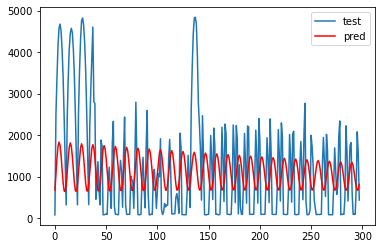

In [155]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df12

In [156]:
df12 = pd.read_csv('df12.csv')
df12 = df12[['Time','Adresse','T1','P_DC']]
df12['Time']= pd.to_datetime(df12['Time'])
df12 = df12.set_index('Time')
df12 = df12.resample('1H').mean()
df12 = df12.between_time('08:00','18:00')
df12 = df12[df12 >= 0]
df12.isna().sum()

Adresse    2100
T1         2105
P_DC       2100
dtype: int64

In [157]:
df12 = df12.dropna()
df12

Adresse         T1         P_DC
Time                                                
2017-04-27 09:00:00    115.0  28.054865  3835.302692
2017-04-27 10:00:00    115.0  35.083490  5636.146000
2017-04-27 11:00:00    115.0  38.760443  6879.307333
2017-04-27 12:00:00    115.0  42.322620  7600.742667
2017-04-27 13:00:00    115.0  41.930120  7880.254000
...                      ...        ...          ...
2020-06-01 14:00:00    115.0  33.094297   106.507467
2020-06-01 15:00:00    115.0  33.410037   662.250200
2020-06-01 16:00:00    115.0  33.424997  1395.717700
2020-06-01 17:00:00    115.0  32.247350   823.554033
2020-06-01 18:00:00    115.0  27.535260   254.361000

[10346 rows x 3 columns]

Text(0, 0.5, 'Count')

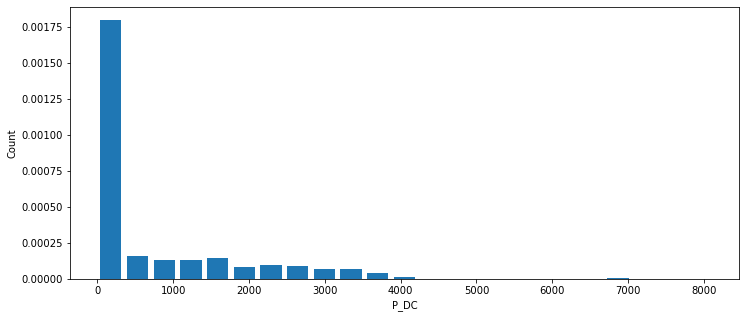

In [158]:
plt.figure(figsize=(12,5))
plt.hist(df12['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

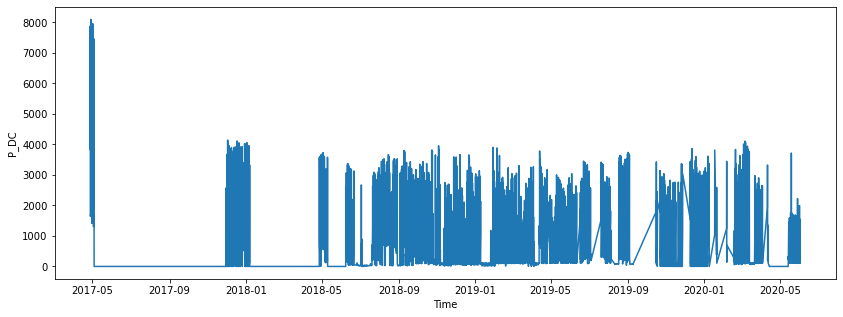

In [159]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df12.index ,y='P_DC' ,data=df12)

In [160]:
mask = (df12.index > '2017-11-01')
df12 = df12.loc[mask]

In [161]:
days_hour = []
clean_low(df12, 1000,days_hour)
for i in days_hour:
    df12 = df12[df12.index != i]
df12

Adresse         T1         P_DC
Time                                                
2017-11-29 08:00:00    115.0  20.754617     0.000000
2017-11-29 09:00:00    115.0  24.556300     0.000000
2017-11-29 10:00:00    115.0  29.512257     0.000000
2017-11-29 11:00:00    115.0  30.977570   644.821757
2017-11-29 12:00:00    115.0  28.334947  2570.020333
...                      ...        ...          ...
2020-06-01 14:00:00    115.0  33.094297   106.507467
2020-06-01 15:00:00    115.0  33.410037   662.250200
2020-06-01 16:00:00    115.0  33.424997  1395.717700
2020-06-01 17:00:00    115.0  32.247350   823.554033
2020-06-01 18:00:00    115.0  27.535260   254.361000

[5437 rows x 3 columns]

 # Stationary test

In [162]:
dftest = adfuller(df12['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.0718459920989094e-11


  # Autocorrelation_ PACF 

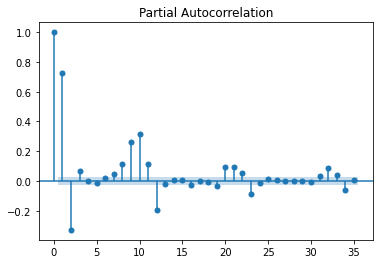

In [163]:
sm.graphics.tsa.plot_pacf(df12['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [164]:
df_AR1 = df12['P_DC']
train_size = int(len(df12) * 0.95)
test_size = len(df12) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df12)]
print(len(train), len(test))

5165 272


In [165]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 5165
Model:                     AutoReg(3)   Log Likelihood              -41340.222
Method:               Conditional MLE   S.D. of innovations            727.510
Date:                Thu, 26 Aug 2021   AIC                             13.181
Time:                        16:24:15   BIC                             13.188
Sample:                             3   HQIC                            13.183
                                 5165                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    435.5239     17.212     25.303      0.000     401.789     469.259
P_DC.L1        0.9931      0.014     71.477      0.000       0.966       1.020
P_DC.L2       -0.3920      0.019    -20.827      0.0

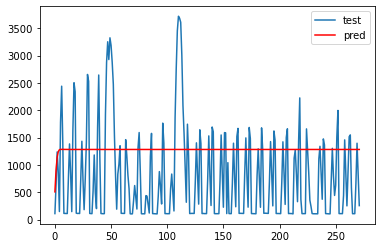

In [166]:
pred = model.predict(start = train_size, end = len(df12)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [167]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=86843.925, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88452.478, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=88332.148, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=88244.515, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=88450.478, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=86948.643, Time=2.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=86843.196, Time=2.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=88190.674, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=87934.343, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=86844.755, Time=4.58 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=87805.414, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=86878.755, Time=4.82 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=86841.412, Time=1.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=88188.673, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5437
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -43416.706
Date:                Thu, 26 Aug 2021   AIC                          86841.412
Time:                        16:24:43   BIC                          86867.816
Sample:                             0   HQIC                         86850.627
                               - 5437                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9295      0.013     72.857      0.000       0.904       0.954
ar.L2         -0.3681      0.013    -29.092      0.000      -0.393      -0.343
ma.L1         -0.9768      0.003   -308.325      0.000      -0.983      -0.971
sigma2      5.066e+05   1.01e+04     50.101      0.000    4.87e+05    5.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                67.20
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.10
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
model = ARIMA(train, order=(2,1,1)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99279D+00    |proj g|=  2.87841D-03

At iterate    5    f=  7.99244D+00    |proj g|=  4.44897D-03


 This problem is unconstrained.



At iterate   10    f=  7.99239D+00    |proj g|=  2.57394D-04

At iterate   15    f=  7.99239D+00    |proj g|=  3.07310D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     26      1     0     0   4.441D-07   7.992D+00
  F =   7.9923856515191662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 5164
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -41272.680
Method:                       css-mle   S.D. of innovations   

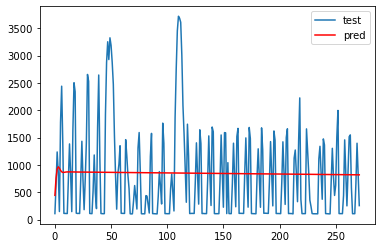

In [169]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df13

In [170]:
df13 = pd.read_csv('df13.csv')
df13 = df13[['Time','Adresse','T1','P_DC']]
df13['Time']= pd.to_datetime(df13['Time'])
df13 = df13.set_index('Time')
df13 = df13.resample('1H').mean()
df13 = df13.between_time('08:00','18:00')
df13 = df13[df13 >= 0]
df13.isna().sum()

Adresse    2284
T1         2294
P_DC       2649
dtype: int64

In [171]:
df13 = df13.dropna()
df13

Adresse         T1         P_DC
Time                                                
2018-02-13 15:00:00    124.0  42.346104     9.110086
2018-02-13 16:00:00    124.0  35.936703     6.950680
2018-02-13 17:00:00    124.0  24.406243    12.190473
2018-02-13 18:00:00    124.0  13.483043     1.167607
2018-02-14 08:00:00    124.0  14.752150    37.851947
...                      ...        ...          ...
2020-06-01 14:00:00    124.0  52.088650    51.431553
2020-06-01 15:00:00    124.0  48.201837   410.540950
2020-06-01 16:00:00    124.0  43.329110  1164.580377
2020-06-01 17:00:00    124.0  35.399197   576.274733
2020-06-01 18:00:00    124.0  27.769983    63.584857

[6574 rows x 3 columns]

Text(0, 0.5, 'Count')

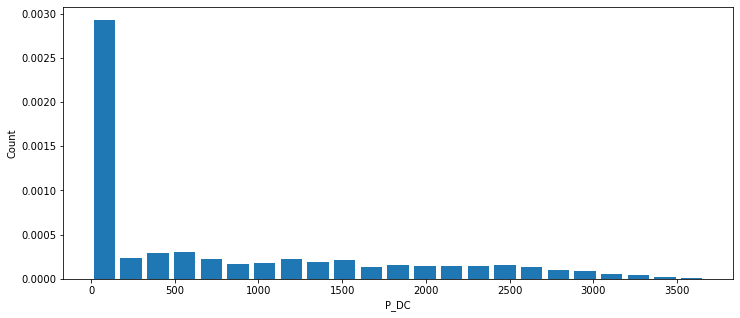

In [172]:
plt.figure(figsize=(12,5))
plt.hist(df13['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

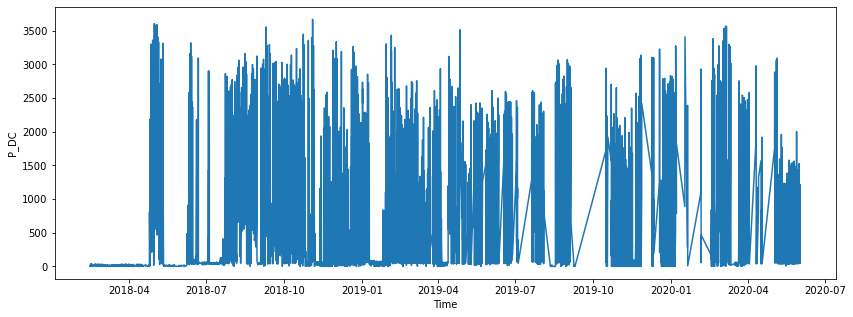

In [173]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df13.index ,y='P_DC' ,data=df13)

In [174]:
mask = (df13.index > '2018-04-15')
df13 = df13.loc[mask]

In [175]:
days_hour = []
clean_low(df13, 500,days_hour)
for i in days_hour:
    df13 = df13[df13.index != i]
df13

Adresse         T1         P_DC
Time                                                
2018-04-24 08:00:00    124.0  15.912357    30.332777
2018-04-24 09:00:00    124.0  19.612327    28.014183
2018-04-24 10:00:00    124.0  31.918343     3.068640
2018-04-24 13:00:00    124.0  35.010373     1.019957
2018-04-24 16:00:00    124.0  15.496423     7.079707
...                      ...        ...          ...
2020-06-01 14:00:00    124.0  52.088650    51.431553
2020-06-01 15:00:00    124.0  48.201837   410.540950
2020-06-01 16:00:00    124.0  43.329110  1164.580377
2020-06-01 17:00:00    124.0  35.399197   576.274733
2020-06-01 18:00:00    124.0  27.769983    63.584857

[5076 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

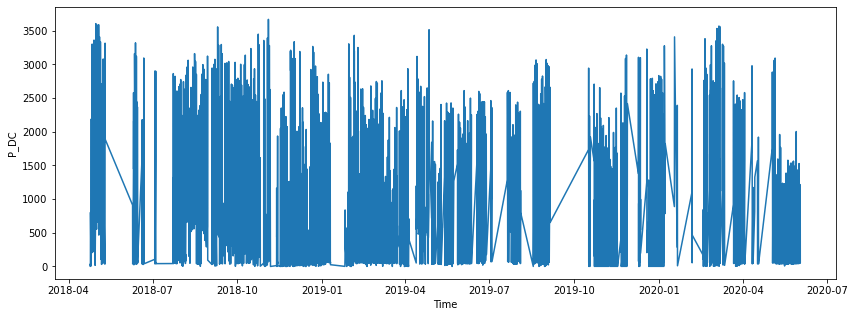

In [176]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df13.index ,y='P_DC' ,data=df13)

 # Stationary test

In [177]:
dftest = adfuller(df13['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 1.0861639295148728e-11


 # Autocorrelation_ PACF  

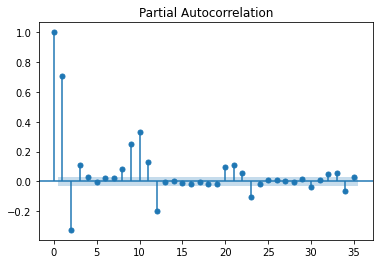

In [178]:
sm.graphics.tsa.plot_pacf(df13['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [179]:
df_AR1 = df13['P_DC']
train_size = int(len(df13) * 0.95)
test_size = len(df13) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df13)]
print(len(train), len(test))

4822 254


In [180]:
model = AutoReg(train, lags = 4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4822
Model:                     AutoReg(4)   Log Likelihood              -38001.377
Method:               Conditional MLE   S.D. of innovations            644.476
Date:                Thu, 26 Aug 2021   AIC                             12.939
Time:                        16:25:35   BIC                             12.947
Sample:                             4   HQIC                            12.942
                                 4822                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    349.9923     16.134     21.693      0.000     318.370     381.614
P_DC.L1        0.9715      0.014     67.473      0.000       0.943       1.000
P_DC.L2       -0.4109      0.020    -20.483      0.0

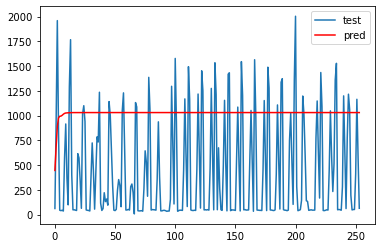

In [181]:
pred = model.predict(start = train_size, end = len(df13)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [182]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=79830.463, Time=3.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81418.158, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=81332.722, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=81245.370, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81416.158, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=79922.942, Time=2.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=79838.366, Time=2.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=79808.500, Time=5.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=79849.410, Time=2.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=79833.672, Time=6.46 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=7.32 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=79843.191, Time=6.14 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=79863.177, Time=8.57 sec
 ARIMA(2,1,3)(0,0,0)[0]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5076
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -39897.253
Date:                Thu, 26 Aug 2021   AIC                          79806.505
Time:                        16:26:48   BIC                          79845.698
Sample:                             0   HQIC                         79820.231
                               - 5076                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2197      0.035     35.140      0.000       1.152       1.288
ar.L2         -0.5082      0.019    -26.562      0.000      -0.546      -0.471
ma.L1         -1.2913      0.037    -35.054      0.000      -1.364      -1.219
ma.L2          0.1223      0.033      3.701      0.000       0.058       0.187
ma.L3          0.2137      0.026      8.207      0.000       0.163       0.265
sigma2      3.889e+05   7343.464     52.964      0.000    3.75e+05    4.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                96.73
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [183]:
model = ARIMA(train, order=(2,1,3)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87184D+00    |proj g|=  7.98650D-04

At iterate    5    f=  7.87181D+00    |proj g|=  1.82343D-04


 This problem is unconstrained.



At iterate   10    f=  7.87181D+00    |proj g|=  5.17808D-05

At iterate   15    f=  7.87181D+00    |proj g|=  3.48166D-05

At iterate   20    f=  7.87181D+00    |proj g|=  1.06581D-04

At iterate   25    f=  7.87181D+00    |proj g|=  6.21725D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     39      1     0     0   2.665D-07   7.872D+00
  F =   7.8718066445830255     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 4821
Model:           

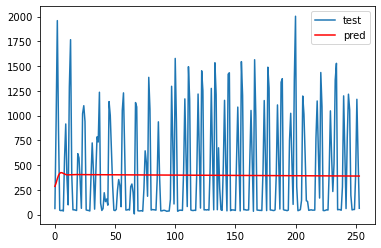

In [184]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df15

In [40]:
df15 = pd.read_csv('df15.csv')
df15 = df15[['Time','Adresse','T1','P_DC']]
df15['Time']= pd.to_datetime(df15['Time'])
df15 = df15.set_index('Time')
df15 = df15.resample('1H').mean()
df15 = df15.between_time('08:00','18:00')
df15 = df15[df15 >= 0]
df15.isna().sum()

Adresse    2019
T1         2031
P_DC       2975
dtype: int64

In [41]:
df15 = df15.dropna()
df15

Adresse         T1         P_DC
Time                                                
2018-02-13 15:00:00    128.0  35.814086     0.000000
2018-02-13 16:00:00    128.0  30.881083     0.000000
2018-02-13 17:00:00    128.0  21.702113     0.000000
2018-02-13 18:00:00    128.0  13.584370     0.000000
2018-02-14 09:00:00    128.0  21.956750     0.000000
...                      ...        ...          ...
2020-06-01 14:00:00    128.0  52.057607    51.301987
2020-06-01 15:00:00    128.0  47.426580   451.690450
2020-06-01 16:00:00    128.0  43.362890  1732.158083
2020-06-01 17:00:00    128.0  34.137007   922.835133
2020-06-01 18:00:00    128.0  26.595700   187.855943

[6246 rows x 3 columns]

Text(0, 0.5, 'Count')

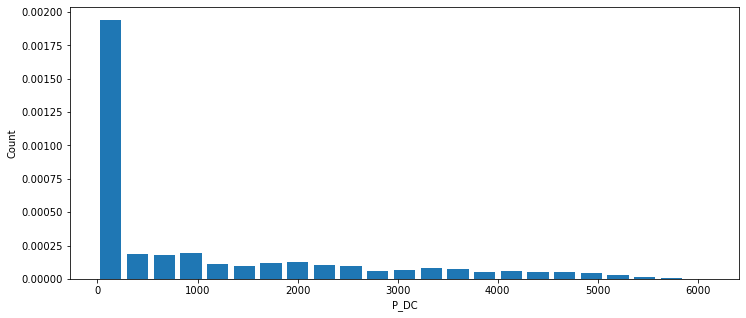

In [187]:
plt.figure(figsize=(12,5))
plt.hist(df15['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

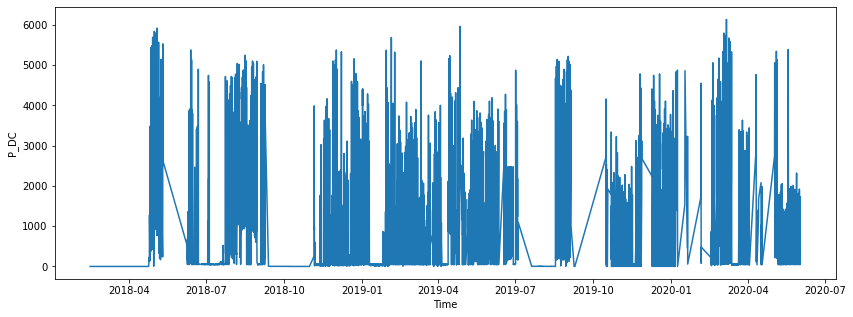

In [188]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df15.index ,y='P_DC' ,data=df15)

In [42]:
mask = (df15.index > '2018-04-15')
df15 = df15.loc[mask]

In [43]:
days_hour = []
clean_low(df15, 1000,days_hour)
for i in days_hour:
    df15 = df15[df15.index != i]
df15

Adresse         T1         P_DC
Time                                                
2018-04-24 12:00:00    128.0  43.479860   229.697317
2018-04-24 16:00:00    128.0  15.591087   126.716070
2018-04-24 17:00:00    128.0  20.576510  1124.222020
2018-04-24 18:00:00    128.0  20.494107  1275.070867
2018-04-25 08:00:00    128.0  14.675337   144.668897
...                      ...        ...          ...
2020-06-01 14:00:00    128.0  52.057607    51.301987
2020-06-01 15:00:00    128.0  47.426580   451.690450
2020-06-01 16:00:00    128.0  43.362890  1732.158083
2020-06-01 17:00:00    128.0  34.137007   922.835133
2020-06-01 18:00:00    128.0  26.595700   187.855943

[4454 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

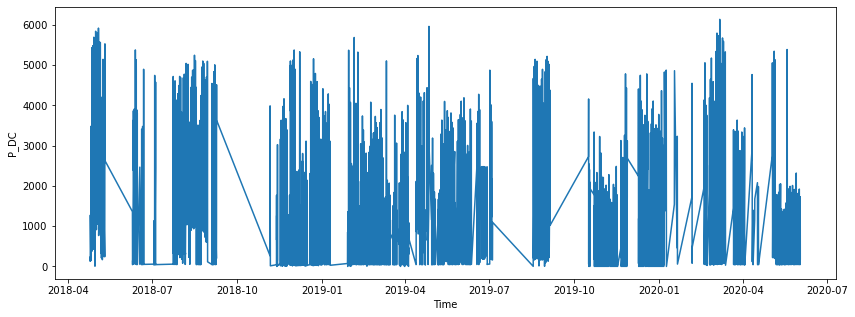

In [191]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df15.index ,y='P_DC' ,data=df15)

 # Stationary test

In [192]:
dftest = adfuller(df15['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 3.86256926617462e-08


 # Autocorrelation_ PACF  

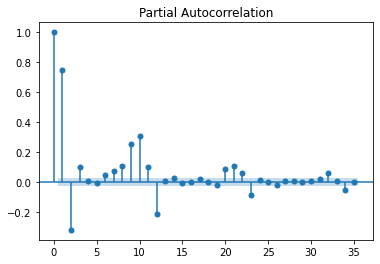

In [193]:
sm.graphics.tsa.plot_pacf(df15['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [194]:
df_AR1 = df15['P_DC'] 
train_size = int(len(df15) * 0.95)
test_size = len(df15) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df15)]
print(len(train), len(test))

4231 223


In [195]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4231
Model:                     AutoReg(3)   Log Likelihood              -35104.128
Method:               Conditional MLE   S.D. of innovations            976.364
Date:                Thu, 26 Aug 2021   AIC                             13.770
Time:                        16:27:41   BIC                             13.778
Sample:                             3   HQIC                            13.773
                                 4231                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    468.9288     23.131     20.273      0.000     423.593     514.264
P_DC.L1        1.0170      0.015     66.396      0.000       0.987       1.047
P_DC.L2       -0.4147      0.021    -19.803      0.0

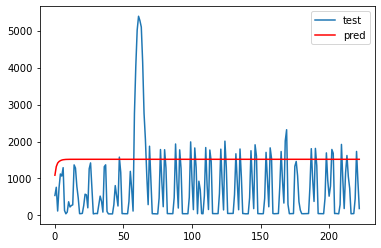

In [196]:
pred = model.predict(start = train_size, end = len(df15)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [197]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=73679.571, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=74976.668, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74874.608, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74795.720, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74974.669, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=73766.514, Time=2.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=73679.141, Time=2.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=74749.164, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=74525.254, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=73680.148, Time=2.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=74428.018, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=73686.600, Time=3.69 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=73677.232, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=74747.164, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4454
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -36834.616
Date:                Thu, 26 Aug 2021   AIC                          73677.232
Time:                        16:28:04   BIC                          73702.838
Sample:                             0   HQIC                         73686.259
                               - 4454                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9249      0.014     68.476      0.000       0.898       0.951
ar.L2         -0.3765      0.013    -28.624      0.000      -0.402      -0.351
ma.L1         -0.9594      0.005   -200.980      0.000      -0.969      -0.950
sigma2      8.957e+05   1.74e+04     51.399      0.000    8.62e+05     9.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):               193.33
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [198]:
model = ARIMA(train, order=(2,1,1)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28237D+00    |proj g|=  2.06413D-04

At iterate    5    f=  8.28237D+00    |proj g|=  4.61853D-06

At iterate   10    f=  8.28237D+00    |proj g|=  3.01981D-05


 This problem is unconstrained.



At iterate   15    f=  8.28237D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   1.776D-07   8.282D+00
  F =   8.2823721028933104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 4230
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -35034.434
Method:                       css-mle   S.D. of innovations            956.433
Date:                Thu, 26 Aug 2021   AIC  

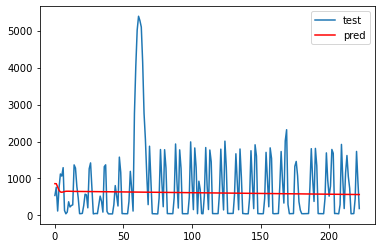

In [199]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df16

In [200]:
df16 = pd.read_csv('df16.csv')
df16 = df16[['Time','Adresse','T1','P_DC']]
df16['Time']= pd.to_datetime(df16['Time'])
df16 = df16.set_index('Time')
df16 = df16.resample('1H').mean()
df16 = df16.between_time('08:00','18:00')
df16 = df16[df16 >= 0]
df16.isna().sum()

Adresse    2019
T1         2030
P_DC       3334
dtype: int64

In [201]:
df16 = df16.dropna()
df16

Adresse         T1        P_DC
Time                                               
2018-02-13 15:00:00    129.0  36.592962    0.000000
2018-02-13 16:00:00    129.0  32.206707    0.000000
2018-02-13 17:00:00    129.0  22.165260    0.000000
2018-02-13 18:00:00    129.0  13.388423    0.000000
2018-02-14 08:00:00    129.0  12.899213    0.000000
...                      ...        ...         ...
2020-01-20 15:00:00    129.0  12.870693  854.019867
2020-01-20 16:00:00    129.0  13.629557  751.184120
2020-01-20 17:00:00    129.0   9.652352   50.212652
2020-02-05 08:00:00    129.0  18.579490  948.193277
2020-02-05 09:00:00    129.0  37.235887   10.903323

[5896 rows x 3 columns]

Text(0, 0.5, 'Count')

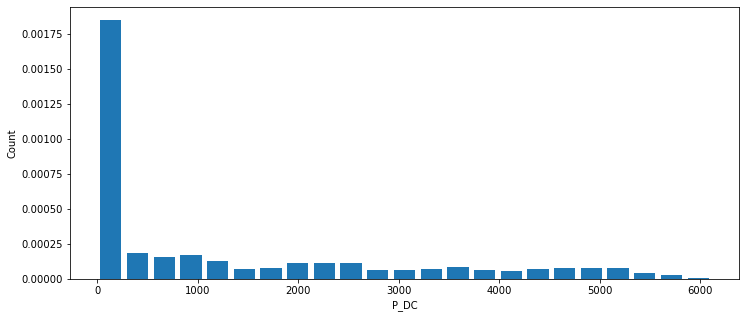

In [202]:
plt.figure(figsize=(12,5))
plt.hist(df16['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

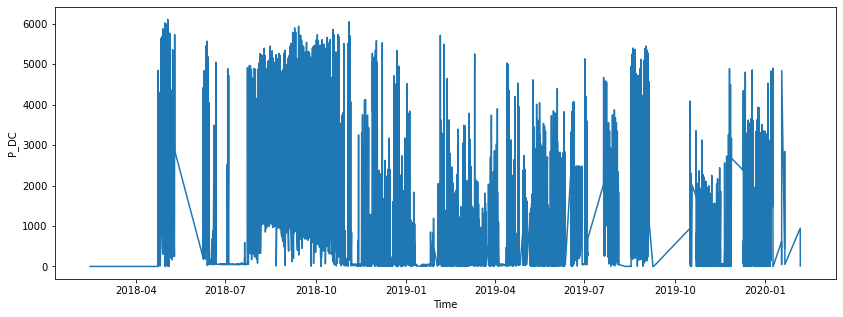

In [203]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df16.index ,y='P_DC' ,data=df16)

In [204]:
mask = (df16.index > '2018-04-15')
df16 = df16.loc[mask]

In [205]:
days_hour = []
clean_low(df16, 1000,days_hour)
for i in days_hour:
    df16 = df16[df16.index != i]
df16

Adresse         T1         P_DC
Time                                                
2018-04-23 10:00:00    129.0  31.559690     0.000000
2018-04-23 11:00:00    129.0  36.305503  1839.735403
2018-04-23 12:00:00    129.0  35.546897  3430.184657
2018-04-23 13:00:00    129.0  38.382243  4696.710533
2018-04-23 14:00:00    129.0  37.557263  4849.621667
...                      ...        ...          ...
2020-01-20 13:00:00    129.0  22.369377  1277.891790
2020-01-20 14:00:00    129.0  31.553453  1722.654290
2020-01-20 15:00:00    129.0  12.870693   854.019867
2020-01-20 16:00:00    129.0  13.629557   751.184120
2020-01-20 17:00:00    129.0   9.652352    50.212652

[4286 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

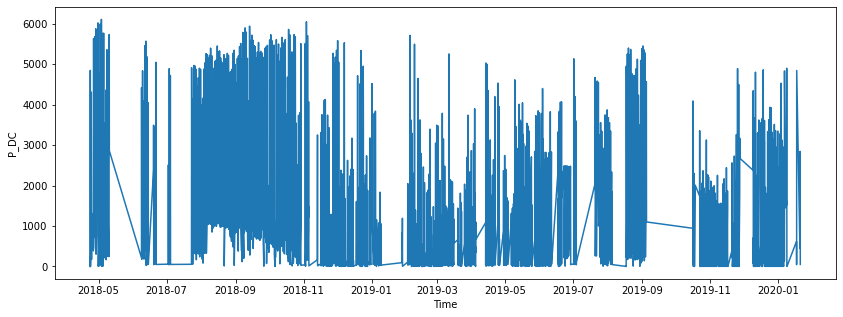

In [206]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df16.index ,y='P_DC' ,data=df16)

 # Stationary test

In [207]:
dftest = adfuller(df16['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 0.001151833428258863


 # Autocorrelation_ PACF  

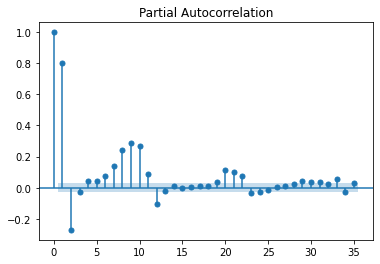

In [208]:
sm.graphics.tsa.plot_pacf(df16['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [209]:
df_AR1 = df16['P_DC'] 
train_size = int(len(df16) * 0.95)
test_size = len(df16) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df16)]
print(len(train), len(test))

4071 215


In [210]:
model = AutoReg(train, lags = 4).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 4071
Model:                     AutoReg(4)   Log Likelihood              -33824.913
Method:               Conditional MLE   S.D. of innovations            990.274
Date:                Thu, 26 Aug 2021   AIC                             13.799
Time:                        16:28:55   BIC                             13.808
Sample:                             4   HQIC                            13.802
                                 4071                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    432.4855     24.815     17.428      0.000     383.848     481.123
P_DC.L1        1.0414      0.016     66.473      0.000       1.011       1.072
P_DC.L2       -0.2600      0.023    -11.488      0.0

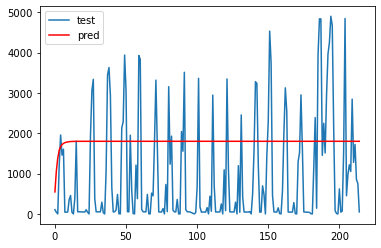

In [211]:
pred = model.predict(start = train_size, end = len(df16)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [212]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=70838.636, Time=3.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72171.166, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=72077.735, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72059.638, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=72169.166, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=71219.103, Time=2.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=71044.950, Time=2.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=70871.297, Time=3.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=70823.136, Time=5.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=71110.967, Time=3.86 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=70825.831, Time=4.22 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=70537.432, Time=5.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=71082.616, Time=4.83 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=70830.379, Time=7.02 sec
 ARIMA(2,1,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4286
Model:               SARIMAX(3, 1, 5)   Log Likelihood              -35179.271
Date:                Thu, 26 Aug 2021   AIC                          70378.542
Time:                        16:30:21   BIC                          70442.171
Sample:                             0   HQIC                         70401.018
                               - 4286                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1023      0.461      0.222      0.824      -0.802       1.006
ar.L1          1.7583      0.064     27.357      0.000       1.632       1.884
ar.L2         -1.1346      0.107    -10.593      0.000      -1.344      -0.925
ar.L3          0.0863      0.063      1.367      0.172      -0.037       0.210
ma.L1         -1.9652      0.064    -30.688      0.000      -2.091      -1.840
ma.L2          1.1500      0.125      9.209      0.000       0.905       1.395
ma.L3          0.0188      0.071      0.264      0.792      -0.121       0.159
ma.L4          0.0055      0.038      0.144      0.885      -0.070       0.081
ma.L5         -0.1783      0.029     -6.245      0.000      -0.234      -0.122
sigma2      8.005e+05   1.31e+04     61.058      0.000    7.75e+05    8.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1125.70
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [213]:
model = ARIMA(train, order=(3,1,5)).fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19522D+00    |proj g|=  1.08571D-02

At iterate    5    f=  8.19520D+00    |proj g|=  8.47322D-04


 This problem is unconstrained.



At iterate   10    f=  8.19519D+00    |proj g|=  3.36442D-04

At iterate   15    f=  8.19518D+00    |proj g|=  8.70948D-04

At iterate   20    f=  8.19517D+00    |proj g|=  9.26725D-04

At iterate   25    f=  8.19517D+00    |proj g|=  4.42313D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     27     43      1     0     0   1.954D-05   8.195D+00
  F =   8.1951746998339416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.P_DC   No. Observations:                 4070
Model:           

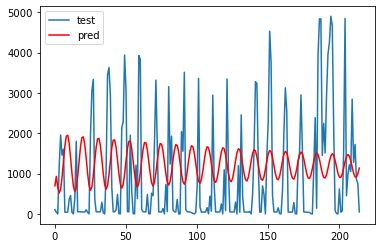

In [214]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df17

In [215]:
df17 = pd.read_csv('df17.csv')
df17 = df17[['Time','Adresse','T1','P_DC']]
df17['Time']= pd.to_datetime(df17['Time'])
df17 = df17.set_index('Time')
df17 = df17.resample('1H').mean()
df17 = df17.between_time('08:00','18:00')
df17 = df17[df17 >= 0]
df17.isna().sum()

Adresse    2019
T1         2019
P_DC       2072
dtype: int64

In [216]:
df17 = df17.dropna()
df17

Adresse         T1         P_DC
Time                                                
2018-02-13 15:00:00    114.0  20.194414     0.000000
2018-02-13 16:00:00    114.0  20.296940     0.000000
2018-02-13 17:00:00    114.0  18.371220     0.000000
2018-02-13 18:00:00    114.0  15.228873     0.000000
2018-02-14 08:00:00    114.0   8.010773     0.000000
...                      ...        ...          ...
2020-06-01 14:00:00    114.0  32.346107  4511.262333
2020-06-01 15:00:00    114.0  32.905677  3673.085000
2020-06-01 16:00:00    114.0  33.491517  2433.340000
2020-06-01 17:00:00    114.0  31.284757  1016.474533
2020-06-01 18:00:00    114.0  26.736213   261.850567

[7161 rows x 3 columns]

Text(0, 0.5, 'Count')

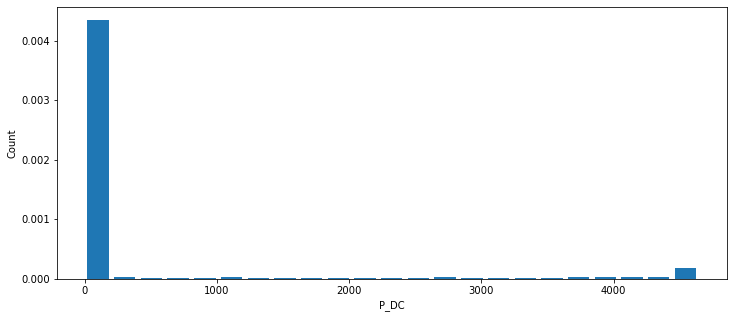

In [217]:
plt.figure(figsize=(12,5))
plt.hist(df17['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

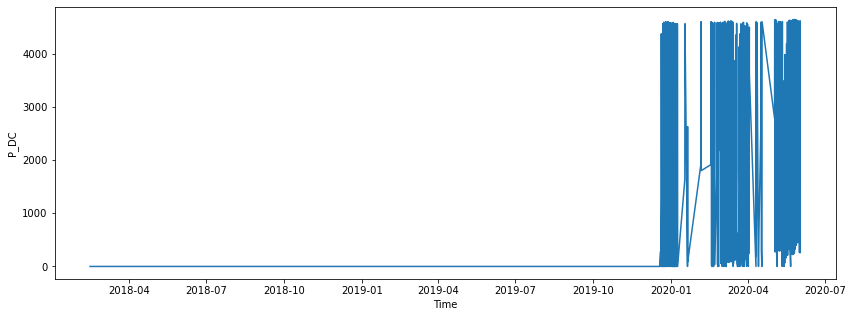

In [218]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df17.index ,y='P_DC' ,data=df17)

In [219]:
mask = (df17.index > '2019-12-15')
df17 = df17.loc[mask]

In [220]:
days_hour = []
clean_low(df17, 1000,days_hour)
for i in days_hour:
    df17 = df17[df17.index != i]
df17

Adresse         T1         P_DC
Time                                                
2019-12-20 11:00:00    114.0  16.594948  1275.963179
2019-12-20 12:00:00    114.0  18.236221  4372.516552
2019-12-20 13:00:00    114.0  18.995655  2692.014138
2019-12-20 14:00:00    114.0  21.188713  3494.304000
2019-12-20 15:00:00    114.0  18.881403  2742.419667
...                      ...        ...          ...
2020-06-01 14:00:00    114.0  32.346107  4511.262333
2020-06-01 15:00:00    114.0  32.905677  3673.085000
2020-06-01 16:00:00    114.0  33.491517  2433.340000
2020-06-01 17:00:00    114.0  31.284757  1016.474533
2020-06-01 18:00:00    114.0  26.736213   261.850567

[1005 rows x 3 columns]

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

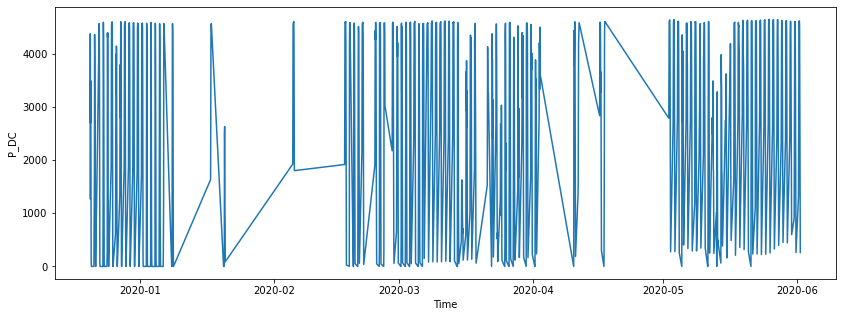

In [221]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df17.index ,y='P_DC' ,data=df17)

 # Stationary test

In [222]:
dftest = adfuller(df17['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 0.001176712160427214


 # Autocorrelation_ PACF  

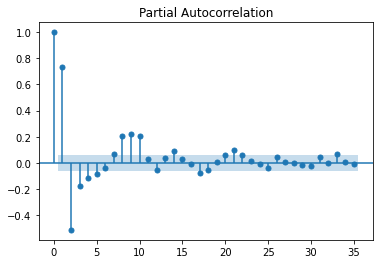

In [223]:
sm.graphics.tsa.plot_pacf(df17['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR  

In [224]:
df_AR1 = df17['P_DC'] 
train_size = int(len(df17) * 0.95)
test_size = len(df17) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df17)]
print(len(train), len(test))

954 51


In [225]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                  954
Model:                     AutoReg(3)   Log Likelihood               -7900.439
Method:               Conditional MLE   S.D. of innovations            980.996
Date:                Thu, 26 Aug 2021   AIC                             13.788
Time:                        16:31:17   BIC                             13.813
Sample:                             3   HQIC                            13.797
                                  954                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1291.1985     72.843     17.726      0.000    1148.428    1433.968
P_DC.L1        1.0298      0.032     32.303      0.000       0.967       1.092
P_DC.L2       -0.3345      0.045     -7.493      0.0

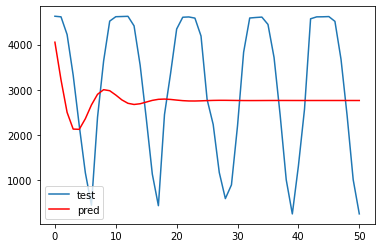

In [226]:
pred = model.predict(start = train_size, end = len(df17)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA 

In [227]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16627.945, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17147.974, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17042.227, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17028.978, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17145.976, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17027.475, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16627.680, Time=1.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16667.727, Time=0.81 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16619.951, Time=1.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16642.305, Time=1.38 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=16610.121, Time=2.06 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=16641.004, Time=1.41 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(4,1,3)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1005
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -8269.635
Date:                Thu, 26 Aug 2021   AIC                          16557.270
Time:                        16:31:41   BIC                          16601.475
Sample:                             0   HQIC                         16574.068
                               - 1005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3878      0.542      0.715      0.474      -0.675       1.450
ar.L1          2.3722      0.062     38.369      0.000       2.251       2.493
ar.L2         -2.4408      0.115    -21.189      0.000      -2.667      -2.215
ar.L3          1.1597      0.100     11.563      0.000       0.963       1.356
ar.L4         -0.2649      0.044     -6.021      0.000      -0.351      -0.179
ma.L1         -2.4668      0.055    -45.081      0.000      -2.574      -2.360
ma.L2          2.2262      0.093     23.907      0.000       2.044       2.409
ma.L3         -0.7423      0.044    -17.003      0.000      -0.828      -0.657
sigma2      8.239e+05   3.35e+04     24.563      0.000    7.58e+05     8.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               150.03
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.35e+14. Standard errors may be unstable.
"""

In [228]:
model = ARIMA(train, order=(4,1,3)).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28044D+00    |proj g|=  2.75460D-03

At iterate    5    f=  8.28032D+00    |proj g|=  2.11973D-03

At iterate   10    f=  8.27154D+00    |proj g|=  4.72220D-02

At iterate   15    f=  8.25701D+00    |proj g|=  9.68097D-03

At iterate   20    f=  8.25577D+00    |proj g|=  1.23196D-02

At iterate   25    f=  8.25564D+00    |proj g|=  2.52633D-03

At iterate   30    f=  8.25564D+00    |proj g|=  4.33253D-04

At iterate   35    f=  8.25564D+00    |proj g|=  7.17648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


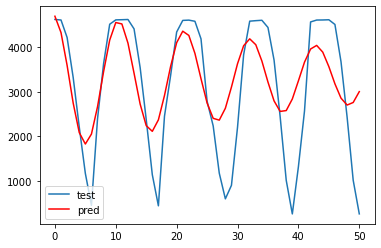

In [229]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# df18

In [5]:
df18 = pd.read_csv('df18.csv')
df18 = df18[['Time','Adresse','T1','P_DC']]
df18['Time']= pd.to_datetime(df18['Time'])
df18 = df18.set_index('Time')
df18 = df18.resample('1H').mean()
df18 = df18.between_time('08:00','18:00')
df18 = df18[df18 >= 0]
df18.isna().sum()

Adresse    2019
T1         2028
P_DC       2180
dtype: int64

In [6]:
df18 = df18.dropna()
df18

Adresse         T1         P_DC
Time                                                
2018-02-13 15:00:00    130.0  29.929076  4941.418571
2018-02-13 16:00:00    130.0  26.570023  3517.646000
2018-02-13 17:00:00    130.0  20.182347  1006.928133
2018-02-13 18:00:00    130.0  13.574460    16.211023
2018-02-14 08:00:00    130.0  12.649860  2370.331667
...                      ...        ...          ...
2020-06-01 14:00:00    130.0  51.382237    63.167600
2020-06-01 15:00:00    130.0  47.678120  1155.548713
2020-06-01 16:00:00    130.0  43.307807  6656.866370
2020-06-01 17:00:00    130.0  34.070560  3781.643333
2020-06-01 18:00:00    130.0  26.768280   815.690400

[7046 rows x 3 columns]

Text(0, 0.5, 'Count')

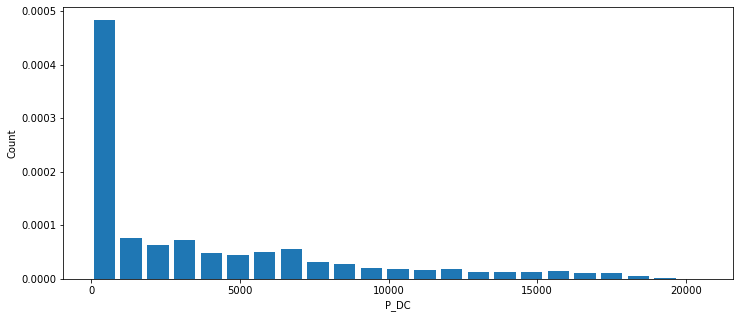

In [232]:
plt.figure(figsize=(12,5))
plt.hist(df18['P_DC'], bins=23, rwidth=0.8, density=True)
plt.xlabel('P_DC')
plt.ylabel('Count')

<AxesSubplot:xlabel='Time', ylabel='P_DC'>

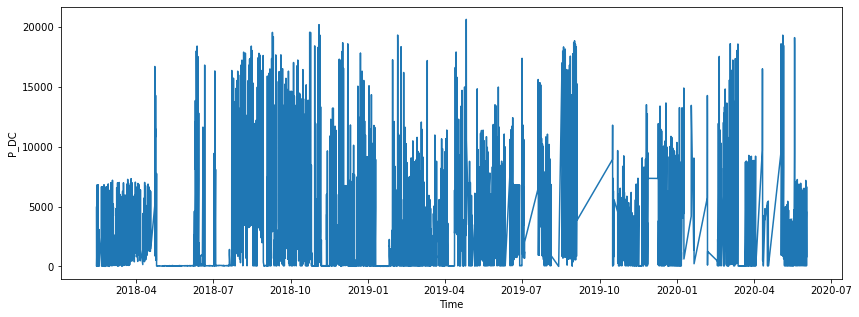

In [233]:
plt.figure(figsize=(14,5))
sn.lineplot(x=df18.index ,y='P_DC' ,data=df18)

 # Stationary test

In [234]:
dftest = adfuller(df18['P_DC'], autolag = 'AIC')
print('P_value_hour',dftest[1])

P_value_hour 2.1109950251468804e-12


 # Autocorrelation_ PACF 

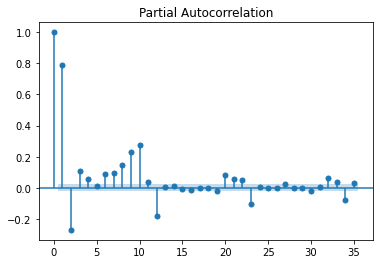

In [235]:
sm.graphics.tsa.plot_pacf(df18['P_DC'].squeeze(), lags = 35)
plt.show()

 # Auto regression model / AR   

In [236]:
df_AR1 = df18['P_DC'] 
train_size = int(len(df18) * 0.95)
test_size = len(df18) - train_size
size = len(df_AR1)
train, test = df_AR1[0:train_size], df_AR1[train_size:len(df18)]
print(len(train), len(test))

6693 353


In [237]:
model = AutoReg(train, lags = 3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   P_DC   No. Observations:                 6693
Model:                     AutoReg(3)   Log Likelihood              -62567.932
Method:               Conditional MLE   S.D. of innovations           2789.221
Date:                Thu, 26 Aug 2021   AIC                             15.869
Time:                        16:32:32   BIC                             15.874
Sample:                             3   HQIC                            15.870
                                 6693                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    934.3998     46.649     20.030      0.000     842.969    1025.831
P_DC.L1        1.0297      0.012     84.670      0.000       1.006       1.054
P_DC.L2       -0.3767      0.017    -22.306      0.0

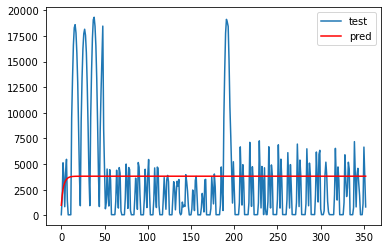

In [238]:
pred = model.predict(start = train_size, end = len(df18)-1, dynamic = False)
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# ARIMA  

In [239]:
wise_fit = auto_arima(df_AR1, trace = True, suppress_warnings = True)
wise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=131417.797, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=133111.693, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=132981.871, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=132898.224, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=133109.693, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=131538.645, Time=1.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=131443.644, Time=1.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=131404.937, Time=2.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=131445.351, Time=2.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=131404.769, Time=3.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=131421.404, Time=3.04 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=131088.572, Time=8.83 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=131294.399, Time=3.61 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=130834.519, Time=15.13 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7046
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -65407.260
Date:                Thu, 26 Aug 2021   AIC                         130834.519
Time:                        16:34:16   BIC                         130903.120
Sample:                             0   HQIC                        130858.150
                               - 7046                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.3210      3.135     -0.421      0.673      -7.465       4.823
ar.L1          1.9863      0.028     70.482      0.000       1.931       2.041
ar.L2         -1.9289      0.048    -39.804      0.000      -2.024      -1.834
ar.L3          0.8502      0.043     19.672      0.000       0.765       0.935
ar.L4         -0.1452      0.028     -5.232      0.000      -0.200      -0.091
ar.L5         -0.1256      0.015     -8.642      0.000      -0.154      -0.097
ma.L1         -2.0774      0.027    -75.594      0.000      -2.131      -2.024
ma.L2          1.7173      0.046     37.328      0.000       1.627       1.807
ma.L3         -0.5460      0.023    -23.461      0.000      -0.592      -0.500
sigma2      6.617e+06   2.48e-05   2.67e+11      0.000    6.62e+06    6.62e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):              4204.06
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.4e+26. Standard errors may be unstable.
"""

In [240]:
model = ARIMA(train, order=(5,1,3)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.28546D+00    |proj g|=  1.11431D-03

At iterate    5    f=  9.28544D+00    |proj g|=  1.15001D-03


 This problem is unconstrained.



At iterate   10    f=  9.28543D+00    |proj g|=  9.15712D-04

At iterate   15    f=  9.28543D+00    |proj g|=  3.96128D-05

At iterate   20    f=  9.28543D+00    |proj g|=  7.10543D-07

At iterate   25    f=  9.28543D+00    |proj g|=  1.59872D-06

At iterate   30    f=  9.28543D+00    |proj g|=  2.66454D-06

At iterate   35    f=  9.28543D+00    |proj g|=  6.18172D-05

At iterate   40    f=  9.28543D+00    |proj g|=  3.89022D-05

At iterate   45    f=  9.28543D+00    |proj g|=  2.48690D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     63      1     0     0   1.776D-07   9.285D+00
  F =   9.28542790291

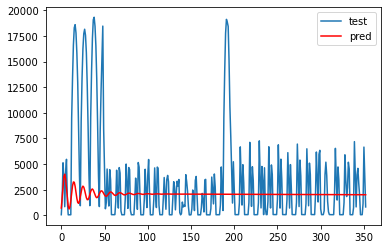

In [241]:
pred = model.predict(start=train_size, end = size-1, typ='levels')
plt.plot(test.values, label = 'test')
plt.plot(pred.values,'r', label='pred')
plt.legend()

# Deep learning

In [8]:
Benguerir_2018 = pd.read_csv("Benguerir_2018.xls",delimiter=';')
Benguerir_2019 = pd.read_csv("Bengueirir_2019.xls",delimiter=';')

In [9]:
df_meteo = pd.concat([Benguerir_2018,Benguerir_2019])

In [10]:
df_meteo['Time'].unique()

array(['01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00',
       '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00',
       '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00', '24:00:00'], dtype=object)

In [11]:
df_meteo = df_meteo[df_meteo['Time'] >= '08:00']
df_meteo = df_meteo[df_meteo['Time'] <= '18:00']

In [12]:
df_meteo['Date'] = df_meteo['Date'] + ' ' + df_meteo['Time']
df_meteo.head(3)

Date   Time  Global Horiz  Clear-Sky  Top of Atmosphere  Code  \
7  01/01/2018 08:00  08:00             5          7                 21     5   
8  01/01/2018 09:00  09:00           103        132                236     2   
9  01/01/2018 10:00  10:00           283        320                467     2   

   Temperature  Relative Humidity  Pressure  Wind speed  Wind direction  \
7       281.08              81.32    980.37        3.12           75.36   
8       283.64              73.35    980.85        3.40           82.19   
9       286.75              59.11    981.35        3.36           82.06   

   Rainfall  Snowfall  Snow depth  
7  0.001169       0.0         0.0  
8  0.000261       0.0         0.0  
9  0.000002       0.0         0.0

In [13]:
df_meteo.dtypes

Date                  object
Time                  object
Global Horiz           int64
Clear-Sky              int64
Top of Atmosphere      int64
Code                   int64
Temperature          float64
Relative Humidity    float64
Pressure             float64
Wind speed           float64
Wind direction       float64
Rainfall              object
Snowfall             float64
Snow depth           float64
dtype: object

In [14]:
df_meteo = df_meteo.drop('Time', axis=1)

In [15]:
df_meteo['Date']= pd.to_datetime(df_meteo['Date'])

In [16]:
df_meteo.dtypes

Date                 datetime64[ns]
Global Horiz                  int64
Clear-Sky                     int64
Top of Atmosphere             int64
Code                          int64
Temperature                 float64
Relative Humidity           float64
Pressure                    float64
Wind speed                  float64
Wind direction              float64
Rainfall                     object
Snowfall                    float64
Snow depth                  float64
dtype: object

In [17]:
count = 0
list_x = []
for x in df_meteo['Rainfall']:
    for i in x:
        if i =='.':
            count = count + 1
            if count >= 2 :
                list_x.append(x)
    count = 0

In [18]:
list_x

['1.240.389',
 '1.023.550',
 '1.032.636',
 '1.716.600',
 '2.680.440',
 '2.638.429',
 '1.291.602',
 '2.424.827',
 '1.571.107',
 '1.131.727',
 '2.340.945',
 '1.027.583',
 '1.837.248',
 '1.658.143',
 '1.068.906',
 '1.597.423',
 '1.631.156',
 '1.106.445',
 '1.994.176',
 '3.154.242',
 '2.427.117',
 '1.222.618',
 '1.047.565',
 '1.174.258',
 '1.762.532',
 '2.259.843',
 '2.103.080',
 '1.784.768',
 '1.725.761',
 '3.466.039',
 '2.326.696']

In [19]:
for x in list_x:
    df_meteo = df_meteo[df_meteo['Rainfall'] != x]

In [20]:
df_meteo['Rainfall'] = pd.to_numeric(df_meteo['Rainfall'], downcast='float')

In [21]:
df_meteo = df_meteo.set_index('Date')
df_meteo

Global Horiz  Clear-Sky  Top of Atmosphere  Code  \
Date                                                                    
2018-01-01 08:00:00             5          7                 21     5   
2018-01-01 09:00:00           103        132                236     2   
2018-01-01 10:00:00           283        320                467     2   
2018-01-01 11:00:00           436        480                647     2   
2018-01-01 12:00:00           542        586                762     2   
...                           ...        ...                ...   ...   
2019-12-31 14:00:00           564        596                774     2   
2019-12-31 15:00:00           469        503                670     2   
2019-12-31 16:00:00           318        354                501     2   
2019-12-31 17:00:00           140        169                277     2   
2019-12-31 18:00:00            12         17                 42     5   

                     Temperature  Relative Humidity  Pressure  Wind speed  \
Date                                                                        
2018-01-01 08:00:00       281.08              81.32    980.37        3.12   
2018-01-01 09:00:00       283.64              73.35    980.85        3.40   
2018-01-01 10:00:00       286.75              59.11    981.35        3.36   
2018-01-01 11:00:00       289.92              46.06    981.55        3.67   
2018-01-01 12:00:00       293.05              33.92    981.14        4.60   
...                          ...                ...       ...         ...   
2019-12-31 14:00:00       294.82              22.71    973.57        2.69   
2019-12-31 15:00:00       294.87              22.61    973.08        2.78   
2019-12-31 16:00:00       294.39              23.71    972.97        2.73   
2019-12-31 17:00:00       292.28              37.23    973.17        2.13   
2019-12-31 18:00:00       287.63              50.33    973.61        2.88   

                     Wind direction  Rainfall  Snowfall  Snow depth  
Date                                                                 
2018-01-01 08:00:00           75.36  0.001169       0.0         0.0  
2018-01-01 09:00:00           82.19  0.000261       0.0         0.0  
2018-01-01 10:00:00           82.06  0.000002       0.0         0.0  
2018-01-01 11:00:00           65.03  0.000000       0.0         0.0  
2018-01-01 12:00:00           53.33  0.000000       0.0         0.0  
...                             ...       ...       ...         ...  
2019-12-31 14:00:00          286.40  0.000000       0.0         0.0  
2019-12-31 15:00:00          290.06  0.000000       0.0         0.0  
2019-12-31 16:00:00          294.39  0.000000       0.0         0.0  
2019-12-31 17:00:00          302.98  0.000000       0.0         0.0  
2019-12-31 18:00:00          314.21  0.000000       0.0         0.0  

[7999 rows x 12 columns]

## Df12

In [256]:
merged_12 = df_meteo.merge(df12, left_index=True, right_index=True)

In [257]:
merged_12.count()

Global Horiz         4445
Clear-Sky            4445
Top of Atmosphere    4445
Code                 4445
Temperature          4445
Relative Humidity    4445
Pressure             4445
Wind speed           4445
Wind direction       4445
Rainfall             4445
Snowfall             4445
Snow depth           4445
Adresse              4445
T1                   4445
P_DC                 4445
dtype: int64

### Preprocessing

In [258]:
df = merged_12.drop(['P_DC'], axis=1)
f_columns = df.columns

In [259]:
train_size = int(len(merged_12) * 0.9)
test_size = len(merged_12) - train_size
train, test = merged_12.iloc[0:train_size], merged_12.iloc[train_size:len(merged_12)]
print(len(train), len(test))

4000 445


In [260]:
train  

Global Horiz  Clear-Sky  Top of Atmosphere  Code  \
2018-01-01 08:00:00             5          7                 21     5   
2018-01-01 09:00:00           103        132                236     2   
2018-01-01 10:00:00           283        320                467     2   
2018-01-01 11:00:00           436        480                647     2   
2018-01-01 12:00:00           542        586                762     2   
...                           ...        ...                ...   ...   
2019-10-30 11:00:00           561        632                847     2   
2019-10-30 12:00:00           652        714                943     2   
2019-10-30 13:00:00           698        729                962     2   
2019-10-30 14:00:00           655        677                904     2   
2019-10-30 15:00:00           538        561                772     2   

                     Temperature  Relative Humidity  Pressure  Wind speed  \
2018-01-01 08:00:00       281.08              81.32    980.37        3.12   
2018-01-01 09:00:00       283.64              73.35    980.85        3.40   
2018-01-01 10:00:00       286.75              59.11    981.35        3.36   
2018-01-01 11:00:00       289.92              46.06    981.55        3.67   
2018-01-01 12:00:00       293.05              33.92    981.14        4.60   
...                          ...                ...       ...         ...   
2019-10-30 11:00:00       297.18              38.50    970.96        2.20   
2019-10-30 12:00:00       298.28              34.62    970.78        2.61   
2019-10-30 13:00:00       299.39              31.20    970.31        3.07   
2019-10-30 14:00:00       300.56              27.77    969.72        3.47   
2019-10-30 15:00:00       301.15              25.51    969.37        3.96   

                     Wind direction  Rainfall  Snowfall  Snow depth  Adresse  \
2018-01-01 08:00:00           75.36  0.001169       0.0         0.0    115.0   
2018-01-01 09:00:00           82.19  0.000261       0.0         0.0    115.0   
2018-01-01 10:00:00           82.06  0.000002       0.0         0.0    115.0   
2018-01-01 11:00:00           65.03  0.000000       0.0         0.0    115.0   
2018-01-01 12:00:00           53.33  0.000000       0.0         0.0    115.0   
...                             ...       ...       ...         ...      ...   
2019-10-30 11:00:00            7.97  0.000000       0.0         0.0    115.0   
2019-10-30 12:00:00            5.97  0.000000       0.0         0.0    115.0   
2019-10-30 13:00:00            3.35  0.000000       0.0         0.0    115.0   
2019-10-30 14:00:00            4.04  0.000000       0.0         0.0    115.0   
2019-10-30 15:00:00            5.43  0.000000       0.0         0.0    115.0   

                            T1         P_DC  
2018-01-01 08:00:00  17.243703  1134.428090  
2018-01-01 09:00:00  24.613147  2598.389000  
2018-01-01 10:00:00  25.953970  3438.625667  
2018-01-01 11:00:00  27.763207  3894.376000  
2018-01-01 12:00:00  26.885483  4040.085333  
...                        ...          ...  
2019-10-30 11:00:00  33.761473  1704.384967  
2019-10-30 12:00:00  32.701413   437.668500  
2019-10-30 13:00:00  29.925323   308.251500  
2019-10-30 14:00:00  28.888620   684.734933  
2019-10-30 15:00:00  28.697290  1269.872300  

[4000 rows x 15 columns]

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [261]:
f_transformer = MinMaxScaler(feature_range=(0,1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

In [262]:
P_DC_transformer = f_transformer.fit(train[['P_DC']])
train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])

In [263]:
train.head()

Global Horiz  Clear-Sky  Top of Atmosphere  Code  \
2018-01-01 08:00:00      0.001859   0.000944           0.001554   1.0   
2018-01-01 09:00:00      0.092937   0.118980           0.168609   0.0   
2018-01-01 10:00:00      0.260223   0.296506           0.348096   0.0   
2018-01-01 11:00:00      0.402416   0.447592           0.487956   0.0   
2018-01-01 12:00:00      0.500929   0.547686           0.577312   0.0   

                     Temperature  Relative Humidity  Pressure  Wind speed  \
2018-01-01 08:00:00     0.107109           0.797674  0.959658    0.196721   
2018-01-01 09:00:00     0.168588           0.711855  0.976068    0.215082   
2018-01-01 10:00:00     0.243276           0.558523  0.993162    0.212459   
2018-01-01 11:00:00     0.319404           0.418004  1.000000    0.232787   
2018-01-01 12:00:00     0.394573           0.287283  0.985983    0.293770   

                     Wind direction  Rainfall  Snowfall  Snow depth  Adresse  \
2018-01-01 08:00:00        0.209289  0.001224       0.0         0.0      0.0   
2018-01-01 09:00:00        0.228263  0.000273       0.0         0.0      0.0   
2018-01-01 10:00:00        0.227902  0.000002       0.0         0.0      0.0   
2018-01-01 11:00:00        0.180593  0.000000       0.0         0.0      0.0   
2018-01-01 12:00:00        0.148092  0.000000       0.0         0.0      0.0   

                           T1      P_DC  
2018-01-01 08:00:00  0.358055  0.279884  
2018-01-01 09:00:00  0.512845  0.641069  
2018-01-01 10:00:00  0.541008  0.848371  
2018-01-01 11:00:00  0.579009  0.960812  
2018-01-01 12:00:00  0.560574  0.996761

In [30]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)         
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

### LSTM

In [265]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[f_columns], train['P_DC'], time_steps)
X_test, y_test = create_dataset(test[f_columns], test['P_DC'], time_steps)
print(X_train.shape, y_train.shape)
#samples, timesteps, features_number

(3990, 10, 14) (3990,)


In [25]:
import tensorflow as tf
from tensorflow import keras

2021-08-26 23:08:44.592844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-26 23:08:44.592917: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [267]:
#sequential model ?
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=30,activation='relu', # number of neurons this layers is going to have
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2)) #dropout ?? droupout penalize complex models
model.add(keras.layers.Dense(units=1)) # output neuron
model.compile(loss='mean_squared_error', optimizer='adam')

2021-08-26 16:34:24.654684: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-26 16:34:24.654903: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-26 16:34:24.655223: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bf74d84fd37d): /proc/driver/nvidia/version does not exist
2021-08-26 16:34:24.656494: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [268]:
history = model.fit(
    X_train, y_train,
    epochs=1000,# the training data will be used x times by our model
    batch_size=32, #32 samples every step
    validation_split=0.1, #10% percent
    shuffle=False # not shuffelling because of time series data ?? what is shuffling
)

2021-08-26 16:34:24.753076: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
113/113 [==============================] - 3s 8ms/step - loss: 0.0921 - val_loss: 0.0695
Epoch 2/1000
113/113 [==============================] - 1s 8ms/step - loss: 0.0720 - val_loss: 0.0646
Epoch 3/1000
113/113 [==============================] - 1s 7ms/step - loss: 0.0672 - val_loss: 0.0635
Epoch 4/1000
113/113 [==============================] - 1s 6ms/step - loss: 0.0642 - val_loss: 0.0621
Epoch 5/1000
113/113 [==============================] - 1s 6ms/step - loss: 0.0632 - val_loss: 0.0618
Epoch 6/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.0619 - val_loss: 0.0614
Epoch 7/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.0627 - val_loss: 0.0610
Epoch 8/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.0613 - val_loss: 0.0605
Epoch 9/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.0612 - val_loss: 0.0602
Epoch 10/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.060

In [269]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 60)                10800     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 10,861
Trainable params: 10,861
Non-trainable params: 0
_________________________________________________________________


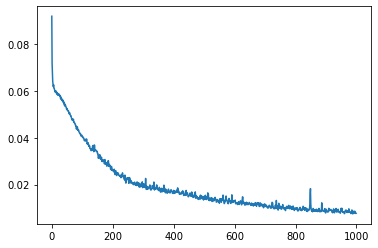

In [270]:
plt.plot(history.history['loss'])
plt.show()

In [271]:
y_pred = model.predict(X_test)

In [272]:
y_test_inv = P_DC_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = P_DC_transformer.inverse_transform(y_pred)

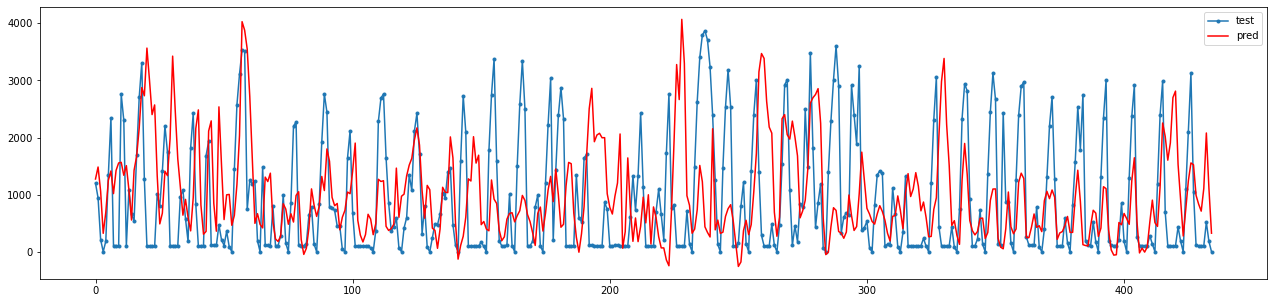

In [273]:
plt.figure(figsize=(22,5))
plt.plot(y_test_inv.flatten(), marker='.', label='test')
plt.plot(y_pred_inv,'r', label='pred')
plt.legend()

## Df13

In [274]:
merged_13= df_meteo.merge(df13, left_index=True, right_index=True)

In [ ]:
df = merged_13.drop(['P_DC'], axis=1)
f_columns = df.columns

### Preprocessing

In [275]:
train_size = int(len(merged_13) * 0.9)
test_size = len(merged_13) - train_size
train, test = merged_13.iloc[0:train_size], merged_13.iloc[train_size:len(merged_13)]
print(len(train), len(test))

3833 426


In [276]:
f_transformer = MinMaxScaler(feature_range=(0,1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

In [277]:
P_DC_transformer = f_transformer.fit(train[['P_DC']])
train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])

### LSTM

In [278]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[f_columns], train['P_DC'], time_steps)
X_test, y_test = create_dataset(test[f_columns], test['P_DC'], time_steps)
print(X_train.shape, y_train.shape)
#samples, timesteps, features_number

(3823, 10, 14) (3823,)


In [279]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=50,activation='relu', # number of neurons this layers is going to have
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2)) #dropout ?? droupout penalize complex models
model.add(keras.layers.Dense(units=1)) # output neuron
model.compile(loss='mean_squared_error', optimizer='adam')


In [280]:
history = model.fit(
    X_train, y_train,
    epochs=1000,# the training data will be used 30 times by our model
    batch_size=32, #32 samples every step
    validation_split=0.1, #10% percent
    shuffle=False # not shuffelling because of time series data ?? what is shuffling
)

Epoch 1/1000
108/108 [==============================] - 3s 9ms/step - loss: 0.0734 - val_loss: 0.0626
Epoch 2/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0649 - val_loss: 0.0614
Epoch 3/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0621 - val_loss: 0.0611
Epoch 4/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0614 - val_loss: 0.0608
Epoch 5/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0600 - val_loss: 0.0607
Epoch 6/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0590 - val_loss: 0.0605
Epoch 7/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0588 - val_loss: 0.0604
Epoch 8/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0588 - val_loss: 0.0606
Epoch 9/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.0577 - val_loss: 0.0606
Epoch 10/1000
108/108 [==============================] - 1s 6ms/step - loss: 0.058

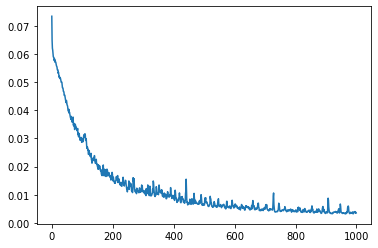

In [281]:
plt.plot(history.history['loss'])
plt.show()

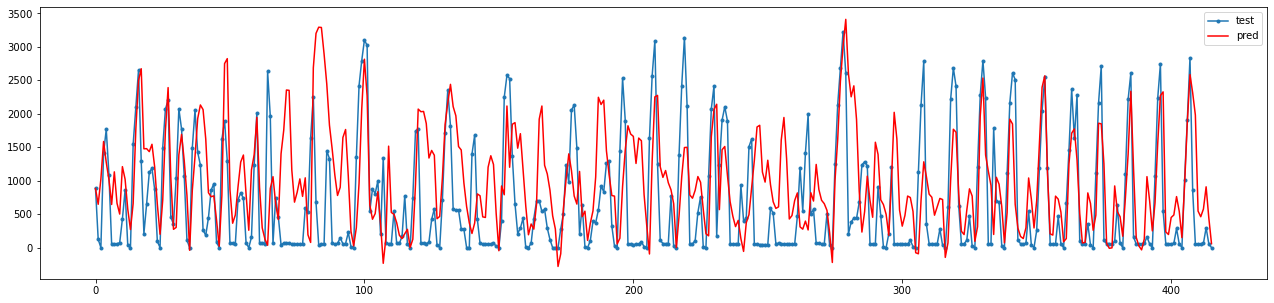

In [282]:
y_pred = model.predict(X_test)
y_test_inv = P_DC_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = P_DC_transformer.inverse_transform(y_pred)
plt.figure(figsize=(22,5))
plt.plot(y_test_inv.flatten(), marker='.', label='test')
plt.plot(y_pred_inv,'r', label='pred')
plt.legend()

## Df15

In [44]:
merged_15 = df_meteo.merge(df15, left_index=True, right_index=True)

In [45]:
df = merged_15.drop(['P_DC'], axis=1)
f_columns = df.columns

### Preprocessing

In [46]:
train_size = int(len(merged_15) * 0.9)
test_size = len(merged_15) - train_size
train, test = merged_15.iloc[0:train_size], merged_15.iloc[train_size:len(merged_15)]
print(len(train), len(test))

3245 361


In [47]:
f_transformer = MinMaxScaler(feature_range=(0,1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [48]:
P_DC_transformer = f_transformer.fit(train[['P_DC']])
train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])

/tmp/ipykernel_37/4076464590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
/tmp/ipykernel_37/4076464590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])


### LSTM

In [49]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[f_columns], train['P_DC'], time_steps)
X_test, y_test = create_dataset(test[f_columns], test['P_DC'], time_steps)
print(X_train.shape, y_train.shape)
#samples, timesteps, features_number

(3235, 10, 14) (3235,)


In [50]:
#sequential model ?
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=50,activation='relu', # number of neurons this layers is going to have
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2)) #dropout ?? droupout penalize complex models
model.add(keras.layers.Dense(units=1)) # output neuron
model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
history = model.fit(
    X_train, y_train,
    epochs=1500,# the training data will be used 30 times by our model
    batch_size=32, #32 samples every step
    validation_split=0.1, #10% percent
    shuffle=False # not shuffelling because of time series data ?? what is shuffling
)

Epoch 1/1500
91/91 [==============================] - 2s 9ms/step - loss: 0.0795 - val_loss: 0.0400
Epoch 2/1500
91/91 [==============================] - 1s 7ms/step - loss: 0.0681 - val_loss: 0.0362
Epoch 3/1500
91/91 [==============================] - 1s 6ms/step - loss: 0.0656 - val_loss: 0.0370
Epoch 4/1500
91/91 [==============================] - 1s 6ms/step - loss: 0.0637 - val_loss: 0.0369
Epoch 5/1500
91/91 [==============================] - 1s 7ms/step - loss: 0.0626 - val_loss: 0.0365
Epoch 6/1500
91/91 [==============================] - 1s 7ms/step - loss: 0.0624 - val_loss: 0.0370
Epoch 7/1500
91/91 [==============================] - 1s 8ms/step - loss: 0.0609 - val_loss: 0.0377
Epoch 8/1500
91/91 [==============================] - 1s 9ms/step - loss: 0.0612 - val_loss: 0.0374
Epoch 9/1500
91/91 [==============================] - 1s 7ms/step - loss: 0.0609 - val_loss: 0.0377
Epoch 10/1500
91/91 [==============================] - 1s 7ms/step - loss: 0.0602 - val_loss: 0.0379

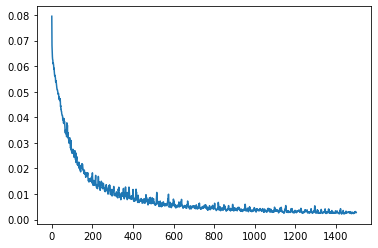

In [52]:
plt.plot(history.history['loss'])
plt.show()

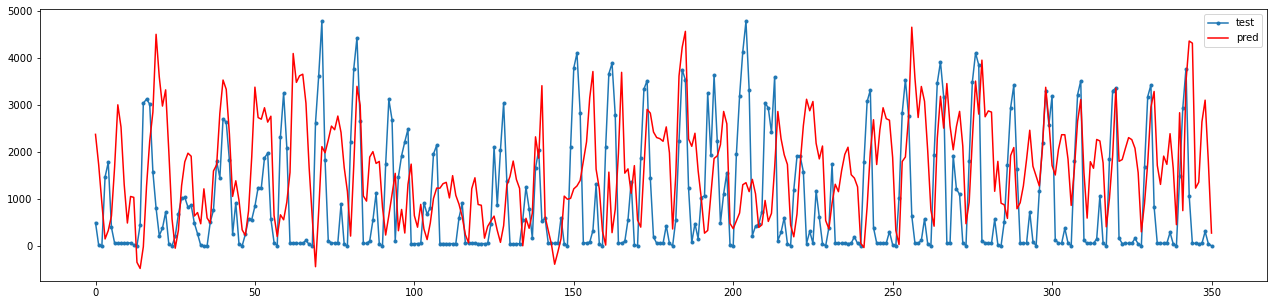

In [53]:
y_pred = model.predict(X_test)
y_test_inv = P_DC_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = P_DC_transformer.inverse_transform(y_pred)
plt.figure(figsize=(22,5))
plt.plot(y_test_inv.flatten(), marker='.', label='test')
plt.plot(y_pred_inv,'r', label='pred')
plt.legend()

## Df16

In [292]:
merged_16 = df_meteo.merge(df16, left_index=True, right_index=True)

In [ ]:
df = merged_16.drop(['P_DC'], axis=1)
f_columns = df.columns

### Preprocessing

In [293]:
train_size = int(len(merged_16) * 0.9)
test_size = len(merged_16) - train_size
train, test = merged_16.iloc[0:train_size], merged_16.iloc[train_size:len(merged_16)]
print(len(train), len(test))

3771 420


In [294]:
f_transformer = MinMaxScaler(feature_range=(0,1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

In [295]:
P_DC_transformer = f_transformer.fit(train[['P_DC']])
train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])

### LSTM

In [296]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[f_columns], train['P_DC'], time_steps)
X_test, y_test = create_dataset(test[f_columns], test['P_DC'], time_steps)
print(X_train.shape, y_train.shape)
#samples, timesteps, features_number

(3761, 10, 14) (3761,)


In [297]:
#sequential model ?
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=50, # number of neurons this layers is going to have
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2)) #dropout ?? droupout penalize complex models
model.add(keras.layers.Dense(units=1)) # output neuron
model.compile(loss='mean_squared_error', optimizer='adam')

In [298]:
history = model.fit(
    X_train, y_train,
    epochs=1000,# the training data will be used 30 times by our model
    batch_size=32, #32 samples every step
    validation_split=0.1, #10% percent
    shuffle=False # not shuffelling because of time series data ?? what is shuffling
)

Epoch 1/1000
106/106 [==============================] - 4s 11ms/step - loss: 0.0763 - val_loss: 0.0693
Epoch 2/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0661 - val_loss: 0.0569
Epoch 3/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0649 - val_loss: 0.0508
Epoch 4/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0651 - val_loss: 0.0486
Epoch 5/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0651 - val_loss: 0.0473
Epoch 6/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0657 - val_loss: 0.0474
Epoch 7/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0656 - val_loss: 0.0485
Epoch 8/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0657 - val_loss: 0.0498
Epoch 9/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.0658 - val_loss: 0.0495
Epoch 10/1000
106/106 [==============================] - 1s 6ms/step - loss: 0.06

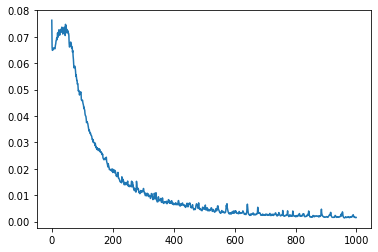

In [299]:
plt.plot(history.history['loss'])
plt.show()

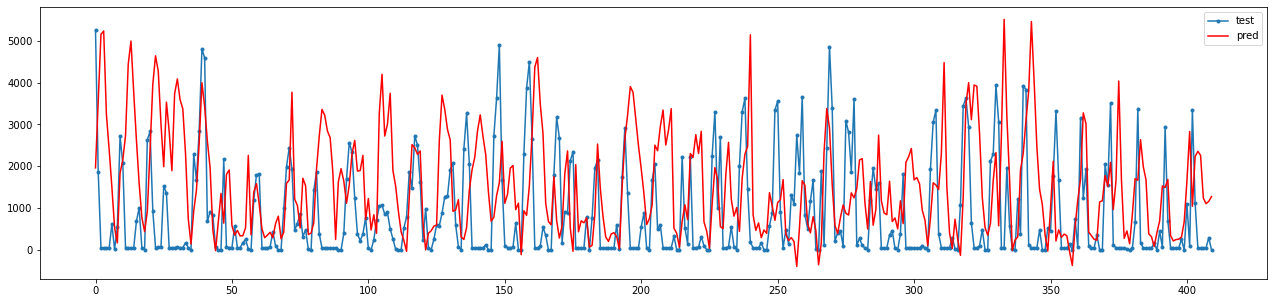

In [300]:
y_pred = model.predict(X_test)
y_test_inv = P_DC_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = P_DC_transformer.inverse_transform(y_pred)
plt.figure(figsize=(22,5))
plt.plot(y_test_inv.flatten(), marker='.', label='test')
plt.plot(y_pred_inv,'r', label='pred')
plt.legend()

## Df18

In [27]:
merged_18 = df_meteo.merge(df18, left_index=True, right_index=True)

In [31]:
df = merged_18.drop(['P_DC'], axis=1)
f_columns = df.columns

### Preprocessing

In [32]:
train_size = int(len(merged_18) * 0.9)
test_size = len(merged_18) - train_size
train, test = merged_18.iloc[0:train_size], merged_18.iloc[train_size:len(merged_18)]
print(len(train), len(test))

5478 609


In [33]:
f_transformer = MinMaxScaler(feature_range=(0,1))
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [34]:
P_DC_transformer = f_transformer.fit(train[['P_DC']])
train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])

/tmp/ipykernel_37/4076464590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['P_DC'] = P_DC_transformer.transform(train[['P_DC']])
/tmp/ipykernel_37/4076464590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['P_DC'] = P_DC_transformer.transform(test[['P_DC']])


### LSTM

In [35]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[f_columns], train['P_DC'], time_steps)
X_test, y_test = create_dataset(test[f_columns], test['P_DC'], time_steps)
print(X_train.shape, y_train.shape)
#samples, timesteps, features_number

(5468, 10, 14) (5468,)


In [36]:
#sequential model ?
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=100, # number of neurons this layers is going to have
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2)) #dropout ?? droupout penalize complex models
model.add(keras.layers.Dense(units=1)) # output neuron
model.compile(loss='mean_squared_error', optimizer='adam')

2021-08-26 23:12:28.001235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-26 23:12:28.001288: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-26 23:12:28.001313: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bf74d84fd37d): /proc/driver/nvidia/version does not exist
2021-08-26 23:12:28.001495: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
history = model.fit(
    X_train, y_train,
    epochs=1000,# the training data will be used 30 times by our model
    batch_size=32, #32 samples every step
    validation_split=0.1, #10% percent
    shuffle=False # not shuffelling because of time series data ?? what is shuffling
)

2021-08-26 23:12:29.274792: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
154/154 [==============================] - 4s 13ms/step - loss: 0.0552 - val_loss: 0.0935
Epoch 2/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0482 - val_loss: 0.0870
Epoch 3/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0486 - val_loss: 0.0771
Epoch 4/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0493 - val_loss: 0.0707
Epoch 5/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0489 - val_loss: 0.0674
Epoch 6/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0482 - val_loss: 0.0671
Epoch 7/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0480 - val_loss: 0.0662
Epoch 8/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0479 - val_loss: 0.0658
Epoch 9/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.0477 - val_loss: 0.0658
Epoch 10/1000
154/154 [==============================] - 1s 9ms/step - loss: 0.04

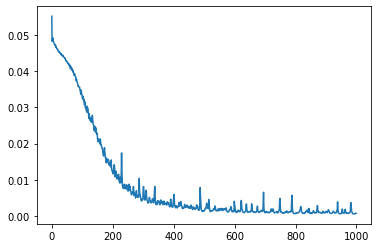

In [38]:
plt.plot(history.history['loss'])
plt.show()

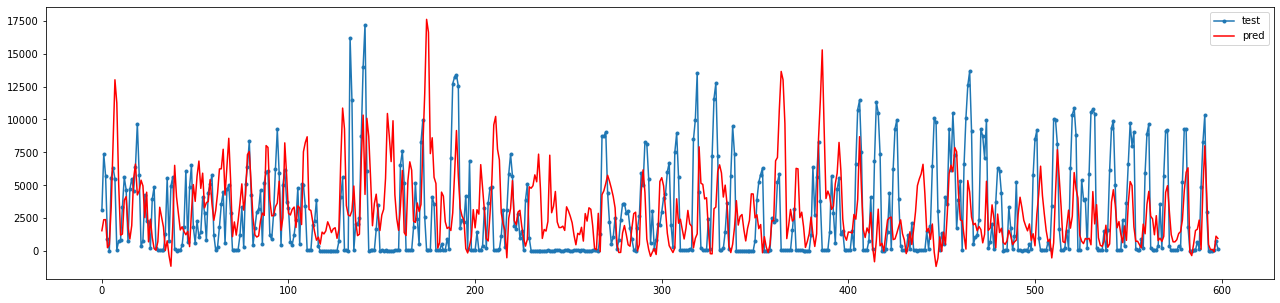

In [39]:
y_pred = model.predict(X_test)
y_test_inv = P_DC_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = P_DC_transformer.inverse_transform(y_pred)
plt.figure(figsize=(22,5))
plt.plot(y_test_inv.flatten(), marker='.', label='test')
plt.plot(y_pred_inv,'r', label='pred') 
plt.legend()